Sona Davis
# FINAL PROJECT 
Introduction to Active Galactic Nuclei

## TASK 1:

The first project task is to extract top 10,000 galaxies with narrow emission lines with redshift
z<0.35 from the SDSS database (e.g., DR17 or DR18 –http://www.sdss.org/) using the SQL
search and produce BPT diagram.


**task a)** Obtain the following line fluxes[O III] l5007, Hb, [N II] l6583, Ha, [S II] ll6716, 6731,
[O I] l6300, and equivalent width of Ha from the SDSS spectral databases (tips: when
selecting galaxies define as one of the criteria that you only need narrow emission line; find a
way to calculate line fluxes using only data available in SDSS tables). For the division line use
the theoretical curves obtained by Kewley et al. (2001) and empirical curves from Kauffman
et al. (2003). Make plots for [O III] l5007/Hb vs. [N II] l6583/Ha, denoting with different
marks/colors different object

**SQL query to obtain the galaxies from SDSS database**

SELECT TOP 10000

--count(*)

s.plate, s.mjd, s.fiberid, s.z, s.ra, s.dec,

g.h_alpha_flux, g.h_beta_flux, g.oiii_5007_flux, g.nii_6584_flux, g.oi_6300_flux,

g.sii_6717_flux, g.sii_6731_flux,

g.h_alpha_eqw

FROM SpecObj AS s

JOIN GalSpecLine AS g ON s.specobjid = g.specobjid

WHERE

g.h_alpha_eqw < 0 -- ensure emission in H_alpha

AND g.h_beta_eqw < 0 -- ensure emission in H_beta

AND g.oiii_5007_eqw < 0 -- ensure emission in [OIII]5007

AND g.nii_6584_eqw < 0

AND g.oi_6300_eqw < 0

AND g.sii_6717_eqw < 0

AND g.sii_6731_eqw <0

AND g.h_beta_flux > 0

AND g.h_alpha_flux > 0

AND g.oiii_5007_flux > 0

AND g.nii_6584_flux > 0

AND g.oi_6300_flux > 0

AND g.sii_6717_flux > 0

AND g.sii_6731_flux > 0

AND SQRT(8*LOG(2)) * g.sigma_balmer < 500 -- FWHM = sigma * sqrt(8ln(2)) for narrow emission lines

AND s.class = "GALAXY"

AND s.z < 0.35

In [69]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading the csv file
# data set of galaxies downloaded from SDSS by using SQL query
import csv
datap1 = pd.read_csv("/home/user/Documents/AGN/project/psqldata1.csv")
datap1

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,oi_6300_flux,sii_6717_flux,sii_6731_flux,h_alpha_eqw
0,266,51630,262,0.122466,145.44666,0.077355,204.65320,34.083980,5.229819,89.173480,3.137749,27.295520,22.576730,-31.103350
1,266,51630,312,0.123589,145.21905,-0.186154,13.89163,6.178319,15.051090,15.275420,3.060909,3.013376,6.056537,-0.926454
2,267,51608,87,0.090429,148.26946,-0.856656,151.74380,32.219090,14.328060,68.432630,8.774839,29.933880,18.376440,-9.440907
3,267,51608,118,0.214898,148.81068,0.164846,73.58038,16.142860,12.409190,34.059070,4.169881,13.458300,19.354680,-8.349762
4,267,51608,245,0.019468,147.37478,-0.858989,60.90096,15.584860,21.522990,16.085560,2.867806,13.189310,8.636026,-21.233380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,309,51994,216,0.054756,223.43767,-0.963381,50.84202,14.038810,9.585857,9.213584,1.361908,11.830050,7.812255,-18.620440
9996,309,51994,341,0.040417,222.50902,0.578778,53.59904,13.147330,33.392900,68.996430,5.699737,19.905230,10.796340,-0.627624
9997,309,51994,370,0.043363,222.86984,0.907766,324.81790,58.456480,35.592850,161.085100,13.491720,82.308530,57.107940,-10.723400
9998,309,51994,562,0.159902,224.24466,1.081871,93.57501,22.119450,15.788980,59.559960,7.426688,21.968940,15.113620,-10.325310


In [71]:
#extracting the flux values of each line 
Ha = datap1['h_alpha_flux'] 
Hb = datap1['h_beta_flux'] 
oiii = datap1['oiii_5007_flux'] 
nii = datap1['nii_6584_flux'] 

In [73]:
#ratios of oiii/H beta line flux 
l_oiii_Hb = []
oiii_Hb = datap1['oiii_5007_flux'] / datap1['h_beta_flux'] 
#oiii_Hb
l_oiii_Hb = np.log10(oiii_Hb)
#l_oiii_Hb
datap1['log ([OIII]\u03BB5007/H\u03B2)'] = l_oiii_Hb 


In [75]:
data1=datap1
#ratios of nii/H alpha line flux 
l_nii_Ha = []
nii_Ha = data1['nii_6584_flux'] / data1['h_alpha_flux']
#nii_Ha
l_nii_Ha = np.log10(nii_Ha)
#l_nii_Ha
data1['log ([N II]\u03BB6584/H\u03B1)'] = l_nii_Ha


(-4.0, 2.0)

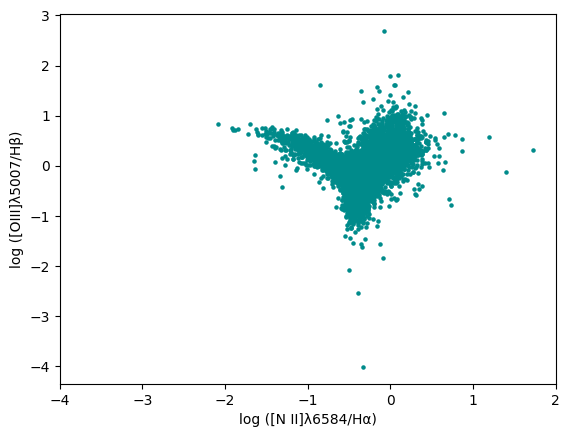

In [77]:
#plot BPT diagram
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')
plt.scatter(l_nii_Ha, l_oiii_Hb , color='darkcyan', s=5)
plt.xlim(-4,2)

In [79]:
# the theoretical curve from the paper Kewley et al. 2001, ApJ, 556, 121
#eqn 5, pg 137
l_oiii_Hb1 = 0.61/(l_nii_Ha-0.47) + 1.19
#l_oiii_Hb1

# empirical curve from the paper Kauffmann et al. 2003, MNRAS, 346, 1055
# eqn 1, pg 5
l_oiii_Hb2 = 0.61/(l_nii_Ha-0.05) + 1.3
#l_oiii_Hb2

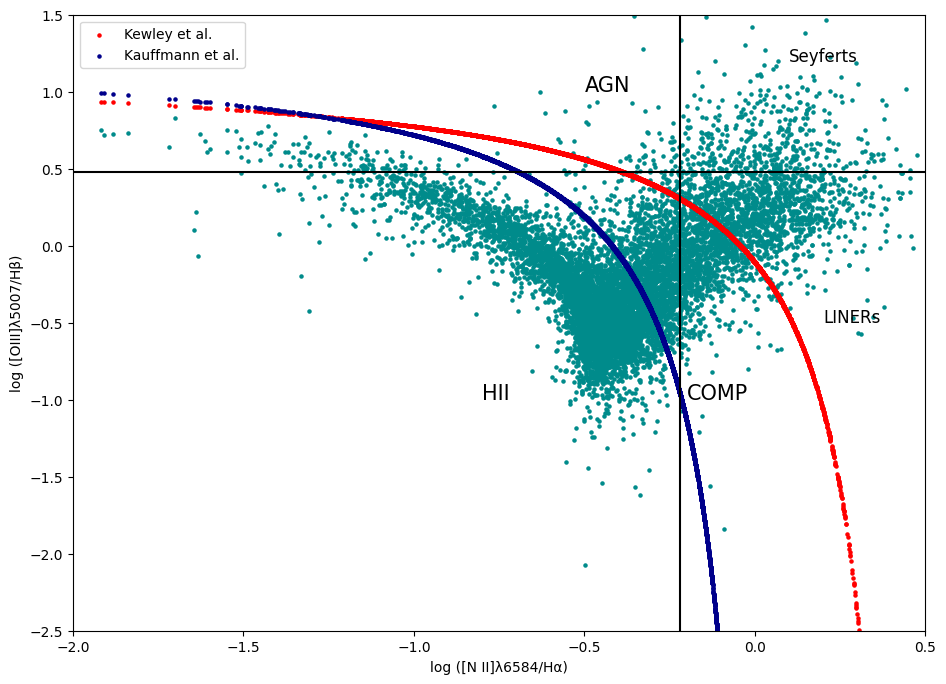

In [81]:
# plotting of the separation curves
plt.figure(figsize=(11,8))
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')
plt.scatter(l_nii_Ha, l_oiii_Hb , color='darkcyan', s=5)
plt.scatter(l_nii_Ha, l_oiii_Hb1 , color='red', s=5, label='Kewley et al.')
plt.scatter(l_nii_Ha, l_oiii_Hb2 , color='darkblue', s=5, label='Kauffmann et al.')
plt.xlim(-2,0.5)
plt.ylim(-2.5,1.5)

# putting text labels in a plot
plt.text(-0.2,-1.0, 'COMP', fontsize=15)
plt.text(0.2,-0.5, 'LINERs', fontsize=12)
plt.text(-0.5,1.0, 'AGN', fontsize=15)
plt.text(-0.8,-1.0, 'HII', fontsize=15)
plt.text(0.1,1.2, 'Seyferts', fontsize=12)

plt.axhline(0.48, linestyle='-', color='black')
plt.axvline(-0.22, linestyle='-', color='black')
plt.legend()

In [83]:
# calculating the opposite values from this equations because it is later required to plot the galaxies acc to classification
l_nii_Ha1=0.47+(0.61/(l_oiii_Hb-1.19))    #from Kewley

l_nii_Ha2= (0.61/(l_oiii_Hb-1.3))+0.05   #from Kauffmann

In [85]:
#classification with different colours
hii_mask = (l_oiii_Hb <= l_oiii_Hb2) & (l_nii_Ha <= l_nii_Ha2)
agn_mask = (l_oiii_Hb >= l_oiii_Hb1) & (l_nii_Ha >= l_nii_Ha1)
composite_mask =  (l_oiii_Hb2 <= l_oiii_Hb) & (l_oiii_Hb <= l_oiii_Hb1)
#composite_mask = ~(hii_mask | agn_mask)



# Create an empty list to store the galaxy classifications
classifications = []

# Loop over the galaxy IDs
for i in range(len(data1)):
   
    # Classify the galaxy
    if (l_oiii_Hb[i] >= l_oiii_Hb1[i]) & (l_nii_Ha[i] >= l_nii_Ha1[i]):
        classification = 'AGN'
    elif (l_oiii_Hb2[i] <= l_oiii_Hb[i]) & (l_oiii_Hb[i] <= l_oiii_Hb1[i]):
        classification = 'COMP'
    elif (l_oiii_Hb[i] <= l_oiii_Hb2[i]) & (l_nii_Ha[i] <= l_nii_Ha2[i]): 
        classification = 'HII'
    
    # Append the classification to the list
    classifications.append(classification)

# Add the classifications to the DataFrame
data1['BPT 1 classification'] = classifications
data1

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,oi_6300_flux,sii_6717_flux,sii_6731_flux,h_alpha_eqw,log ([OIII]λ5007/Hβ),log ([N II]λ6584/Hα),BPT 1 classification
0,266,51630,262,0.122466,145.44666,0.077355,204.65320,34.083980,5.229819,89.173480,3.137749,27.295520,22.576730,-31.103350,-0.814064,-0.360783,HII
1,266,51630,312,0.123589,145.21905,-0.186154,13.89163,6.178319,15.051090,15.275420,3.060909,3.013376,6.056537,-0.926454,0.386698,0.041240,AGN
2,267,51608,87,0.090429,148.26946,-0.856656,151.74380,32.219090,14.328060,68.432630,8.774839,29.933880,18.376440,-9.440907,-0.351926,-0.345848,HII
3,267,51608,118,0.214898,148.81068,0.164846,73.58038,16.142860,12.409190,34.059070,4.169881,13.458300,19.354680,-8.349762,-0.114237,-0.334529,COMP
4,267,51608,245,0.019468,147.37478,-0.858989,60.90096,15.584860,21.522990,16.085560,2.867806,13.189310,8.636026,-21.233380,0.140200,-0.578188,HII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,309,51994,216,0.054756,223.43767,-0.963381,50.84202,14.038810,9.585857,9.213584,1.361908,11.830050,7.812255,-18.620440,-0.165699,-0.741794,HII
9996,309,51994,341,0.040417,222.50902,0.578778,53.59904,13.147330,33.392900,68.996430,5.699737,19.905230,10.796340,-0.627624,0.404817,0.109670,AGN
9997,309,51994,370,0.043363,222.86984,0.907766,324.81790,58.456480,35.592850,161.085100,13.491720,82.308530,57.107940,-10.723400,-0.215470,-0.304585,COMP
9998,309,51994,562,0.159902,224.24466,1.081871,93.57501,22.119450,15.788980,59.559960,7.426688,21.968940,15.113620,-10.325310,-0.146420,-0.196205,COMP


Text(-0.1, -0.8, 'COMP')

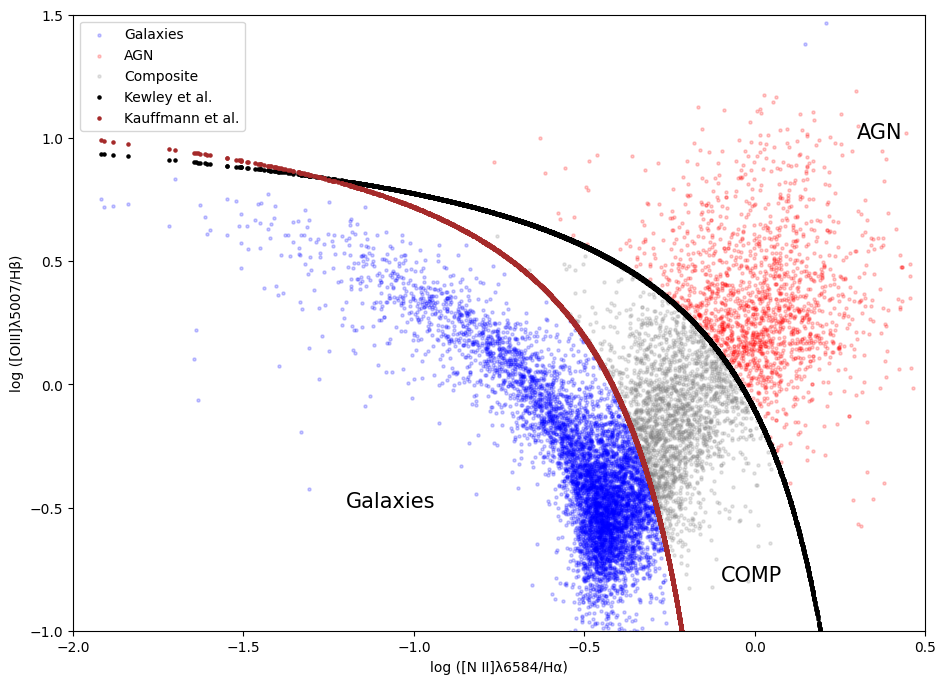

In [87]:
#plot acc to classification
plt.figure(figsize=(11,8))
plt.scatter(l_nii_Ha[hii_mask], l_oiii_Hb[hii_mask], c='blue', s=5, alpha=0.2, label='Galaxies')
plt.scatter(l_nii_Ha[agn_mask], l_oiii_Hb[agn_mask], c='red', s=5, alpha=0.2, label='AGN')
plt.scatter(l_nii_Ha[composite_mask], l_oiii_Hb[composite_mask], c='grey', s=5, alpha=0.2, label='Composite')
plt.scatter(l_nii_Ha, l_oiii_Hb1 ,  color='black', s=5, label='Kewley et al.')
plt.scatter(l_nii_Ha, l_oiii_Hb2 ,color='brown', s=5,label='Kauffmann et al.')
plt.xlim(-2,0.5)
plt.ylim(-1.0,1.5)
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')
plt.legend()
plt.text(0.3,1, 'AGN', fontsize=15)
plt.text(-1.2,-0.5, 'Galaxies', fontsize=15)
plt.text(-0.1,-0.8, 'COMP', fontsize=15)

**task b)** Make a WHAN diagram, the equivalent width of Hα (WHα) vs. [N II]/Hα ratio, for the
objects already classified (keep the same notation, i.e., the classification information
obtained in the BPT diagram). Comment and discuss the obtained results, give the
number/percentage of objects classified as (strong) AGN/Seyferts by the BPT and WHAN diagrams.

In [90]:
#acc. to fig.1 of Cid Fernandes, R. et al. 2011, MNRAS, 413, 1687
# plotting WHAN diagram
l_Ha_eqw = []
Ha_eqw = -data1['h_alpha_eqw']   #taking positive values while plotting since eqw width of emission lines r negative
l_Ha_eqw = np.log10(Ha_eqw)
#Ha_eqw
data1['log (H\u03B1 eqw)'] = l_Ha_eqw
#data1
#plt.scatter(l_nii_Ha, l_Ha_eqw, c='green', s=5)
#plt.xlim(-2, 4)

In [92]:
classifications4 = []

# Loop over the galaxy IDs
for i in range(len(data1)):
   
    # Classify the galaxy acc to WHAN
    if (l_nii_Ha[i] < -0.4) & (Ha_eqw[i] > 3):
        classification4 = 'SF'
    elif (l_nii_Ha[i] > -0.4) & (Ha_eqw[i] > 6):
        classification4 = 'sAGN'
    elif (Ha_eqw[i] < 3):
        classification4 = 'RGs'
    elif (l_nii_Ha[i] > -0.4) & (Ha_eqw[i] >= 3) & (Ha_eqw[i] <= 6): 
        classification4 = 'wAGN'
    else:
        classification4 = 'Passive'
    
    
    # Append the classification to the list
    classifications4.append(classification4)

# Add the classifications to the DataFrame
data1['WHAN classification'] = classifications4
data1

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,oi_6300_flux,sii_6717_flux,sii_6731_flux,h_alpha_eqw,log ([OIII]λ5007/Hβ),log ([N II]λ6584/Hα),BPT 1 classification,log (Hα eqw),WHAN classification
0,266,51630,262,0.122466,145.44666,0.077355,204.65320,34.083980,5.229819,89.173480,3.137749,27.295520,22.576730,-31.103350,-0.814064,-0.360783,HII,1.492807,sAGN
1,266,51630,312,0.123589,145.21905,-0.186154,13.89163,6.178319,15.051090,15.275420,3.060909,3.013376,6.056537,-0.926454,0.386698,0.041240,AGN,-0.033176,RGs
2,267,51608,87,0.090429,148.26946,-0.856656,151.74380,32.219090,14.328060,68.432630,8.774839,29.933880,18.376440,-9.440907,-0.351926,-0.345848,HII,0.975014,sAGN
3,267,51608,118,0.214898,148.81068,0.164846,73.58038,16.142860,12.409190,34.059070,4.169881,13.458300,19.354680,-8.349762,-0.114237,-0.334529,COMP,0.921674,sAGN
4,267,51608,245,0.019468,147.37478,-0.858989,60.90096,15.584860,21.522990,16.085560,2.867806,13.189310,8.636026,-21.233380,0.140200,-0.578188,HII,1.327019,SF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,309,51994,216,0.054756,223.43767,-0.963381,50.84202,14.038810,9.585857,9.213584,1.361908,11.830050,7.812255,-18.620440,-0.165699,-0.741794,HII,1.269990,SF
9996,309,51994,341,0.040417,222.50902,0.578778,53.59904,13.147330,33.392900,68.996430,5.699737,19.905230,10.796340,-0.627624,0.404817,0.109670,AGN,-0.202301,RGs
9997,309,51994,370,0.043363,222.86984,0.907766,324.81790,58.456480,35.592850,161.085100,13.491720,82.308530,57.107940,-10.723400,-0.215470,-0.304585,COMP,1.030333,sAGN
9998,309,51994,562,0.159902,224.24466,1.081871,93.57501,22.119450,15.788980,59.559960,7.426688,21.968940,15.113620,-10.325310,-0.146420,-0.196205,COMP,1.013903,sAGN


In [94]:
sf_mask2 = (l_nii_Ha < -0.4) & (Ha_eqw > 3)
sAGN_mask2 = (l_nii_Ha > -0.4) & (Ha_eqw > 6)
RG_mask2 = Ha_eqw < 3
wAGN_mask2 = (l_nii_Ha > -0.4) & (Ha_eqw >= 3) & (Ha_eqw <= 6)

#plt.scatter(l_nii_Ha[sf_mask2], Ha_eqw[sf_mask2], c='cyan', s=5, alpha=0.2, label='SF')
#plt.scatter(l_nii_Ha[RG_mask2], Ha_eqw[RG_mask2], c='red', s=5, alpha=0.2, label='RG')
#plt.scatter(l_nii_Ha[wAGN_mask2], Ha_eqw[wAGN_mask2], c='violet', s=5, alpha=0.2, label='wAGN')
#plt.yscale('log')
#plt.axhline(y=6,xmin=0.74, linestyle='-', color='black')
#plt.axvline(x=-0.4,ymin=0.47, linestyle='-', color='black')
#plt.axhline(3, linestyle='--', color='black')
#plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
#plt.ylabel('H\u03B1$_{eqw}$ in log scale')
#plt.xlim(-6,1.5)
#plt.title('WHAN Diagram')
#plt.legend()

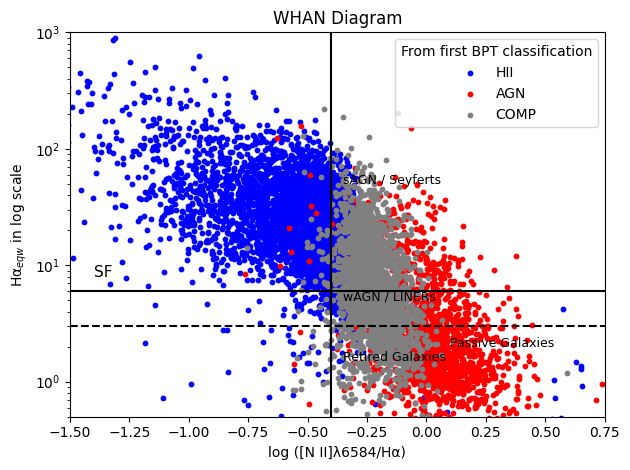

In [96]:
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('H\u03B1$_{eqw}$ in log scale')

def plot_bpt(data, classification, color):
    data_to_plot = data[data['BPT 1 classification'] == classification]
    z = (-1) * data_to_plot['h_alpha_eqw']
    plt.scatter(data_to_plot['log ([N II]λ6584/Hα)'], z, color=color, s=10, label=classification)

bpt_class = ['HII', 'AGN', 'COMP']
colors = ['blue', 'red', 'grey']

for i in range(len(bpt_class)):
    plot_bpt(data1, bpt_class[i], colors[i])






# Set proper limits
plt.xlim(-1.5, 0.75)
plt.ylim(0.5, 1000)  # log scale works better starting from 1
plt.yscale('log')

# Reference classification lines
plt.axvline(x=-0.4, color='black')                     # vertical: [N II]/Hα boundary
plt.axhline(y=6, color='black', linestyle='-')         # horizontal solid: strong vs weak emission
plt.axhline(y=3, color='black', linestyle='--')        # horizontal dashed: retired galaxy boundary

# Annotations (you may need to tweak positions slightly)
plt.text(-1.4, 8, 'SF', fontsize=11)
plt.text(-0.35, 50, 'sAGN / Seyferts', fontsize=9)
plt.text(-0.35, 5, 'wAGN / LINERs', fontsize=9)
plt.text(-0.35, 1.5, 'Retired Galaxies', fontsize=9)
plt.text(0.1, 2, 'Passive Galaxies', fontsize=9)

plt.title('WHAN Diagram')
plt.xlabel('log ([N II]λ6584/Hα)')
plt.ylabel('Hα$_{eqw}$ in log scale')
plt.legend(title='From first BPT classification')
plt.tight_layout()
plt.show()


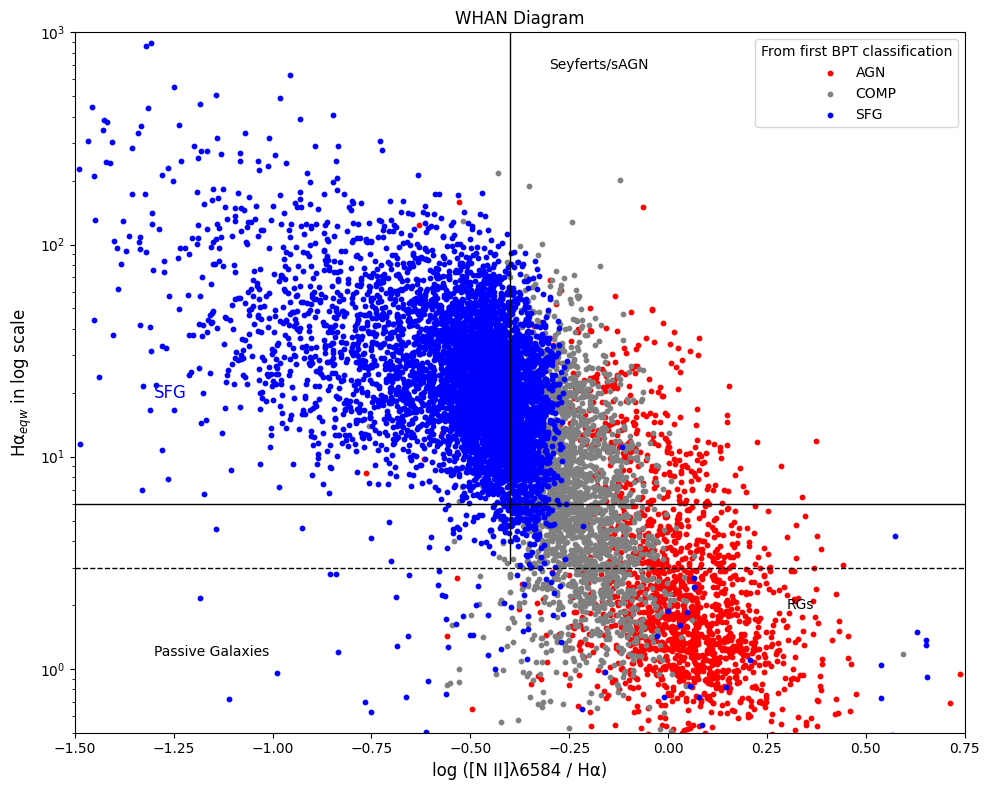

In [98]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))

# Axis labels
plt.xlabel('log ([N II]λ6584 / Hα)', fontsize=12)
plt.ylabel('Hα$_{eqw}$ in log scale', fontsize=12)

# BPT classification to colors and labels
bpt_class = ['AGN', 'COMP', 'HII']
legend_labels = ['AGN', 'COMP', 'SFG']  # Rename HII to SFG
colors = ['red', 'grey', 'blue']

# Plotting by class
def plot_bpt(data, classification, color):
    data_to_plot = data[data['BPT 1 classification'] == classification]
    z = -1 * data_to_plot['h_alpha_eqw']  # Flip to positive EQW
    plt.scatter(data_to_plot['log ([N II]λ6584/Hα)'], z, color=color, s=10)

for i in range(len(bpt_class)):
    plot_bpt(data1, bpt_class[i], colors[i])

# Accurate classification lines using plt.plot
x_vals = np.linspace(-1.5, 0.75, 100)

# Horizontal line at Hα_eqw = 6 (Seyfert/LINER)
plt.plot(x_vals, [6]*len(x_vals), 'k-', linewidth=1)

# Horizontal dashed line at Hα_eqw = 3 (active/passive)
plt.plot(x_vals, [3]*len(x_vals), 'k--', linewidth=1)

# Vertical line at log([NII]/Hα) = -0.4 (SFG vs RGs)
y_vals = np.logspace(0.5, 3, 100)
plt.plot([-0.4]*len(y_vals), y_vals, 'k-', linewidth=1)

# Set scale and limits
plt.yscale('log')
plt.xlim(-1.5, 0.75)
plt.ylim(0.5, 1000)

# Legend
plt.legend(legend_labels, title='From first BPT classification')

# Region labels
#plt.text(-1.4, 20, 'SFG', fontsize=12, color='blue')
#plt.text(-0.25, 700, 'Seyferts/sAGN', fontsize=10)
#plt.text(-0.25, 7, 'LINERs/wAGN', fontsize=10)
#plt.text(-1.3, 2, 'Passive Galaxies', fontsize=10)
#plt.text(0.3, 2, 'RGs', fontsize=10)


ax = plt.gca()  # Get current axis

# Region labels with adjusted positions and alignment
ax.annotate('SFG', xy=(-1.3, 20), color='blue', fontsize=12, ha='left', va='center')
ax.annotate('Seyferts/sAGN', xy=(-0.3, 700), fontsize=10, ha='left', va='center')
#ax.annotate('LINERs/wAGN', xy=(-0.3, 10), fontsize=10, ha='left', va='center')
ax.annotate('Passive Galaxies', xy=(-1.3, 1.2), fontsize=10, ha='left', va='center')
ax.annotate('RGs', xy=(0.3, 2), fontsize=10, ha='left', va='center')

plt.title('WHAN Diagram')
plt.tight_layout()
plt.show()


**percentage of objects classified as (strong) AGN/Seyferts by the BPT and WHAN**

In [109]:
#print(data1.columns)


In [111]:
print(f"AGN in BPT: {data1[data1['BPT 1 classification'] == 'AGN'].shape[0] / len(data1) * 100:.2f} %\n"
      f"strong AGN in WHAN: {data1[data1['WHAN classification'] == 'sAGN'].shape[0] / len(data1) * 100:.2f} %")


AGN in BPT: 16.91 %
strong AGN in WHAN: 26.35 %


## Task 2

For sample of AGN selected from the SDSS database, find the WISE counterparts with a
matching tolerance of 3ʹʹ (∼ 0.5×FWHM of the WISE PSF at 3.4 μm), and get the three WISE
colors (W1,W2,W3). Locate the object on the WISE colour-colour plot using the selection
criteria defined by Mateos et al. (2012, 2013):

$y = 0.315 × x$

$x ≡ log_{10}(f_{12\mu m}/f_{4.6\mu m})$

$y ≡ log_{10}(f_{4.6\mu m}/f_{3.4\mu m})$


The top and bottom boundaries of the wedge are obtained by adding y-axis intercepts of
+0.297 and −0.110, respectively. The MIR power-law $\alpha=−0.3$ bottom-left limit corresponds to:

$y = −3.172 × x + 0.436$

Plot your results on top of the Figure 12 taken from Wright et al. (2010).
Comment on what is the percentage of object found in both SDSS and WISE survey, what is
the number/percentage of objects defined as AGN by SDSS and WISE, as well as what is the
number/percentage of objects found to be AGN by both surveys.

In [141]:
#reading the data from SDSS
#reading the data from cross matched file obtained by cross matching SDSS data (data1) with WISE
# w1mpro,w2mpro,w3mpro are corresponding WISE colours
data2 = pd.read_csv("/home/user/Documents/AGN/project/datatask2.csv")
data2

,plate,mjd,fiberid,w1mpro,w2mpro,w3mpro
0,6111,56270,579,15.470,15.769,13.804
1,6112,56191,365,15.953,15.776,13.557
2,1472,52913,31,17.381,16.824,13.348
3,1472,52913,639,17.396,17.499,13.343
4,1472,52913,312,17.434,16.764,13.340
...,...,...,...,...,...,...
499249,667,52163,216,9.535,9.146,4.562
499250,669,52559,96,14.205,13.217,3.810
499251,1541,53732,309,14.098,10.655,3.735
499252,426,51882,74,8.035,6.989,3.532


In [143]:
#merging both the data sets based on plate, mjd, fiberid 
data3 = pd.merge(datap1, data2, on=['plate', 'mjd', 'fiberid'])
data3

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,sii_6731_flux,h_alpha_eqw,log ([OIII]λ5007/Hβ),log ([N II]λ6584/Hα),BPT 1 classification,log (Hα eqw),WHAN classification,w1mpro,w2mpro,w3mpro
0,387,51791,389,0.061476,359.498660,0.586338,107.65560,26.826880,22.187840,22.37153,...,20.877690,-25.301670,-0.082455,-0.682341,HII,1.403149,SF,15.615,15.487,11.553
1,387,51791,610,0.096309,0.910494,0.886908,28.24203,6.919958,15.231330,17.94604,...,7.881673,-2.252766,0.342634,-0.196927,AGN,0.352716,RGs,14.522,14.559,12.101
2,387,51791,638,0.061824,1.168509,0.584080,58.41650,8.034585,29.874940,44.39364,...,23.274580,-1.581310,0.570344,-0.119215,AGN,0.199017,RGs,12.895,12.885,12.014
3,388,51793,75,0.073988,2.871767,-0.624319,130.99910,40.256420,11.543250,61.78061,...,18.027780,-12.697950,-0.542507,-0.326416,HII,1.103734,sAGN,14.123,13.904,10.601
4,388,51793,136,0.107001,1.948117,-0.744130,427.90860,84.125540,43.000950,213.69730,...,50.919770,-25.259260,-0.291450,-0.301552,COMP,1.402421,sAGN,13.426,12.970,9.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,430,51877,220,0.026178,28.185038,13.192586,63.67399,21.229010,32.342770,45.08467,...,25.423650,-1.388635,0.182847,-0.149933,COMP,0.142588,RGs,12.417,12.458,9.705
1103,430,51877,400,0.068000,27.376728,13.992567,38.31504,1.198733,12.297900,41.77694,...,3.116780,-1.102078,1.011108,0.037567,AGN,0.042212,RGs,12.704,12.696,11.134
1104,430,51877,518,0.071426,28.503425,14.555926,368.78510,70.569100,12.743720,173.20250,...,37.616010,-28.078130,-0.743318,-0.328219,HII,1.448368,sAGN,14.116,13.858,9.895
1105,430,51877,555,0.084081,28.678065,14.540233,66.82036,13.438530,9.388393,37.96479,...,8.176045,-5.567590,-0.155761,-0.245528,COMP,0.745667,wAGN,14.330,14.270,11.360


In [149]:
# calculating W1 - W2
W_y = []
W_y = data3['w1mpro'] - data3['w2mpro']
#W_y
data3['W1-W2'] = W_y

In [151]:
# calculating W2 - W3
W_x = []
W_x = data3['w2mpro'] - data3['w3mpro']
#W_x
data3['W2-W3'] = W_x

In [155]:
# Create an empty list to store the galaxy classifications acc to Jarrett et al. (2017) showing location of different
#galaxy types defined by Wright et al. (2010)

classifications6 = []

# Loop over the galaxy IDs
for i in range(len(data3)):
   
    # Classify the galaxy
    if W_y[i] >= 0.8:
        classification6 = 'AGN'
    elif W_y[i] <= 0.8 and W_x[i] <= 3.5 and W_x[i]>=2:
        classification6 = 'Intermediate disks'
    elif W_y[i] <= 0.8 and W_x[i] >= 3.5:
        classification6 = 'SF Disks'
    elif W_y[i] <= 0.8 and W_x[i] <= 2:
        classification6 = 'SPHEROIDS'
    # Append the classification to the list
    classifications6.append(classification6)

# Add the classifications to the DataFrame
data3['WISE classification'] = classifications6
data3


,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,log ([N II]λ6584/Hα),BPT 1 classification,log (Hα eqw),WHAN classification,w1mpro,w2mpro,w3mpro,W1-W2,W2-W3,WISE classification
0,387,51791,389,0.061476,359.498660,0.586338,107.65560,26.826880,22.187840,22.37153,...,-0.682341,HII,1.403149,SF,15.615,15.487,11.553,0.128,3.934,SF Disks
1,387,51791,610,0.096309,0.910494,0.886908,28.24203,6.919958,15.231330,17.94604,...,-0.196927,AGN,0.352716,RGs,14.522,14.559,12.101,-0.037,2.458,Intermediate disks
2,387,51791,638,0.061824,1.168509,0.584080,58.41650,8.034585,29.874940,44.39364,...,-0.119215,AGN,0.199017,RGs,12.895,12.885,12.014,0.010,0.871,SPHEROIDS
3,388,51793,75,0.073988,2.871767,-0.624319,130.99910,40.256420,11.543250,61.78061,...,-0.326416,HII,1.103734,sAGN,14.123,13.904,10.601,0.219,3.303,Intermediate disks
4,388,51793,136,0.107001,1.948117,-0.744130,427.90860,84.125540,43.000950,213.69730,...,-0.301552,COMP,1.402421,sAGN,13.426,12.970,9.095,0.456,3.875,SF Disks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,430,51877,220,0.026178,28.185038,13.192586,63.67399,21.229010,32.342770,45.08467,...,-0.149933,COMP,0.142588,RGs,12.417,12.458,9.705,-0.041,2.753,Intermediate disks
1103,430,51877,400,0.068000,27.376728,13.992567,38.31504,1.198733,12.297900,41.77694,...,0.037567,AGN,0.042212,RGs,12.704,12.696,11.134,0.008,1.562,SPHEROIDS
1104,430,51877,518,0.071426,28.503425,14.555926,368.78510,70.569100,12.743720,173.20250,...,-0.328219,HII,1.448368,sAGN,14.116,13.858,9.895,0.258,3.963,SF Disks
1105,430,51877,555,0.084081,28.678065,14.540233,66.82036,13.438530,9.388393,37.96479,...,-0.245528,COMP,0.745667,wAGN,14.330,14.270,11.360,0.060,2.910,Intermediate disks


In [157]:
# counting the number for each type of classification in BPT 
count = data3['BPT 1 classification'].value_counts()
print(count)

BPT 1 classification
HII     715
COMP    217
AGN     175
Name: count, dtype: int64


In [161]:
# counting the number for each type of classification in WISE 
count = data3['WISE classification'].value_counts()
print(count)

WISE classification
Intermediate disks    530
SF Disks              449
SPHEROIDS             124
AGN                     4
Name: count, dtype: int64


In [163]:
# from paper Mateos, S. et al. (2012), MNRAS, 426, 3271
W_y1 = 0.315 * W_x
W_y3 = -3.172 * W_x + 7.624  
W_y4 = 0.315 * W_x + 0.796
W_y5 = 0.315 * W_x - 0.222

In [165]:
W_x1 = W_y/0.315
W_x3 = (W_y - 7.624)/(-3.172)
W_x4 = (W_y - 0.796)/0.315
W_x5 = (W_y + 0.222)/0.315

In [167]:
classifications7 = []

# Loop over the galaxy IDs
for i in range(len(data3)):
   
    # Classify the galaxy
    if ((W_y[i] >= W_y5[i]) & (W_x[i] >= W_x3[i]) & (W_y[i] <= W_y4[i])):
        classification7 = 'AGN'
    else:
        classification7 = 'Not AGN'
    
    classifications7.append(classification7)

# Add the classifications to the DataFrame
data3['Mateos classification'] = classifications7
data3

,plate,mjd,fiberid,z,ra,dec,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,BPT 1 classification,log (Hα eqw),WHAN classification,w1mpro,w2mpro,w3mpro,W1-W2,W2-W3,WISE classification,Mateos classification
0,387,51791,389,0.061476,359.498660,0.586338,107.65560,26.826880,22.187840,22.37153,...,HII,1.403149,SF,15.615,15.487,11.553,0.128,3.934,SF Disks,Not AGN
1,387,51791,610,0.096309,0.910494,0.886908,28.24203,6.919958,15.231330,17.94604,...,AGN,0.352716,RGs,14.522,14.559,12.101,-0.037,2.458,Intermediate disks,Not AGN
2,387,51791,638,0.061824,1.168509,0.584080,58.41650,8.034585,29.874940,44.39364,...,AGN,0.199017,RGs,12.895,12.885,12.014,0.010,0.871,SPHEROIDS,Not AGN
3,388,51793,75,0.073988,2.871767,-0.624319,130.99910,40.256420,11.543250,61.78061,...,HII,1.103734,sAGN,14.123,13.904,10.601,0.219,3.303,Intermediate disks,Not AGN
4,388,51793,136,0.107001,1.948117,-0.744130,427.90860,84.125540,43.000950,213.69730,...,COMP,1.402421,sAGN,13.426,12.970,9.095,0.456,3.875,SF Disks,Not AGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,430,51877,220,0.026178,28.185038,13.192586,63.67399,21.229010,32.342770,45.08467,...,COMP,0.142588,RGs,12.417,12.458,9.705,-0.041,2.753,Intermediate disks,Not AGN
1103,430,51877,400,0.068000,27.376728,13.992567,38.31504,1.198733,12.297900,41.77694,...,AGN,0.042212,RGs,12.704,12.696,11.134,0.008,1.562,SPHEROIDS,Not AGN
1104,430,51877,518,0.071426,28.503425,14.555926,368.78510,70.569100,12.743720,173.20250,...,HII,1.448368,sAGN,14.116,13.858,9.895,0.258,3.963,SF Disks,Not AGN
1105,430,51877,555,0.084081,28.678065,14.540233,66.82036,13.438530,9.388393,37.96479,...,COMP,0.745667,wAGN,14.330,14.270,11.360,0.060,2.910,Intermediate disks,Not AGN


In [171]:
# counting the number for each type of classification in WISE acc to Mateos
count = data3['Mateos classification'].value_counts()
print(count)

Mateos classification
Not AGN    1104
AGN           3
Name: count, dtype: int64


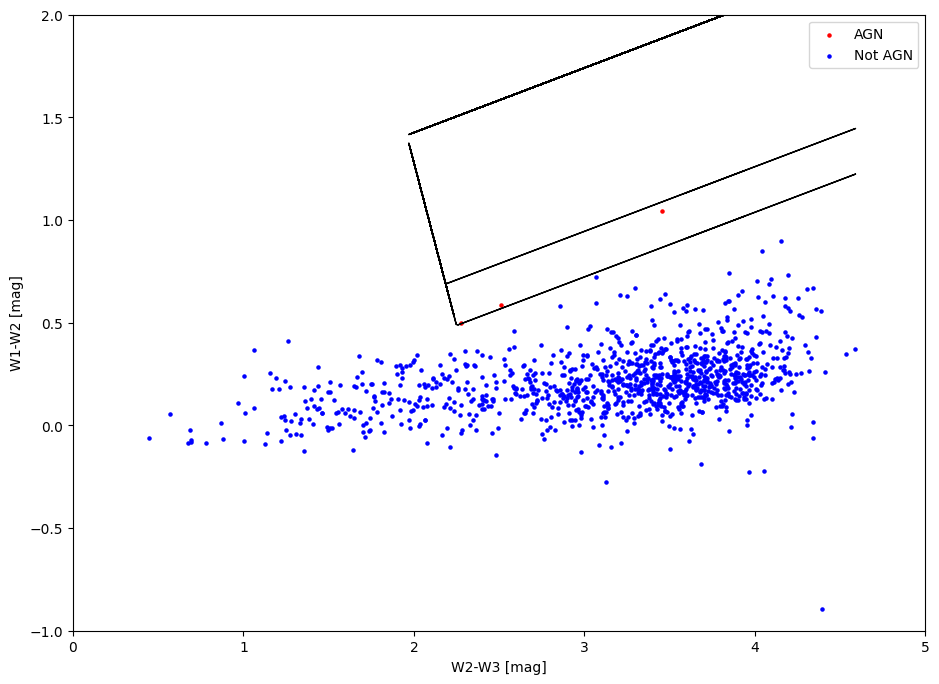

In [181]:
# plotting of WISE-WISE colour diagram for the above galaxies obtained using SDSS

mask3 = W_y3<W_y4
mask4 = W_y3<W_y5
mask5 = W_y3<W_y1
mask6 = (W_y3<W_y4) & (W_y3>W_y5)

mask7 = (W_y >= W_y5) & (W_x >= W_x3) & (W_y <= W_y4)
mask8 = ~(mask7)

plt.figure(figsize=(11,8))
plt.scatter(W_x[mask7], W_y[mask7], color='red', s=5, label='AGN')
plt.scatter(W_x[mask8], W_y[mask8], color='blue', s=5, label='Not AGN')
plt.plot(W_x[mask5], W_y1[mask5], color='black', linewidth=1)
plt.plot(W_x[mask6], W_y3[mask6], color='black', linewidth=1)
plt.plot(W_x[mask3], W_y4[mask3], color='black', linewidth=1)
plt.plot(W_x[mask4], W_y5[mask4], color='black', linewidth=1)
plt.xlabel('W2-W3 [mag]')
plt.ylabel('W1-W2 [mag]')
plt.xlim(0,5)
plt.ylim(-1,2)
plt.legend()

(0.0, 5.0)

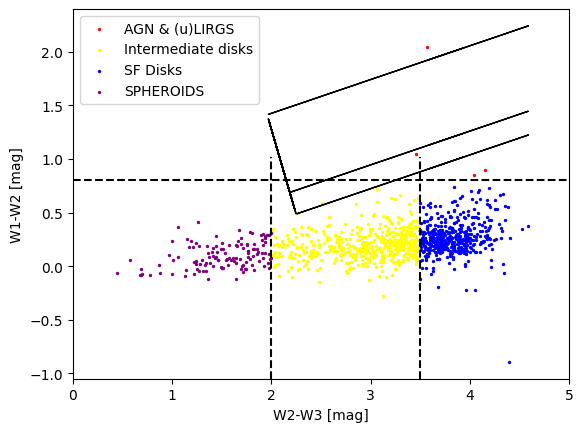

In [179]:
# plotting of WISE-WISE colour diagram for the above galaxies obtained using SDSS

#plt.scatter(W_x, W_y, color='cyan', s=5)
plt.xlabel('W2-W3 [mag]')
plt.ylabel('W1-W2 [mag]')

AGN = (W_y >= 0.8) 
ID = ((W_y <= 0.8) & (W_x <= 3.5) & (W_x>=2))
SF = ((W_y <= 0.8) & (W_x >= 3.5))
SPHEROIDS = ((W_y <= 0.8) & (W_x <= 2))

plt.scatter(W_x[AGN], W_y[AGN], color='red', s=2, label='AGN & (u)LIRGS')
plt.scatter(W_x[ID], W_y[ID], color='yellow', s=2, label='Intermediate disks')
plt.scatter(W_x[SF], W_y[SF], color='blue', s=2, label='SF Disks')
plt.scatter(W_x[SPHEROIDS], W_y[SPHEROIDS], color='purple', s=2, label='SPHEROIDS')
plt.legend()

plt.plot(W_x[mask6], W_y3[mask6], color='black', linewidth=1)
plt.plot(W_x[mask3], W_y4[mask3], color='black', linewidth=1)
plt.plot(W_x[mask4], W_y5[mask4], color='black', linewidth=1)
plt.plot(W_x[mask5], W_y1[mask5], color='black', linewidth=1)

#plotting a horizontal line in a scatter plot
plt.axhline(0.8, linestyle='--', color='black')   

#plotting a vertical line in a scatter plot
plt.axvline(2, ymax=0.6, linestyle='--', color='black')
plt.axvline(3.5, ymax=0.6, linestyle='--', color='black')
plt.xlim(0,5)

In [177]:
# counting the no. of each type of classification, i.e., AGN for the two different WISE classification 
mask9 = data3[['WISE classification', 'Mateos classification']] == 'AGN'

# Use the boolean mask to filter the dataframe and count the number of matches
count1 = mask9.all(axis=1).sum()


print(count1)   #AGN

1


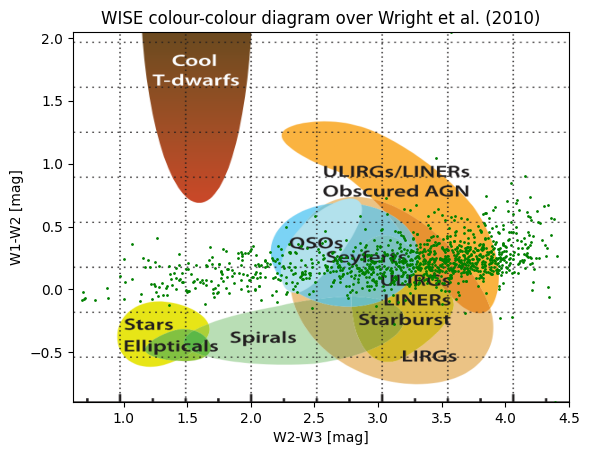

In [268]:
import matplotlib.image as mpimg

# Load the image
image_path = ("/home/user/Documents/AGN/project/wright 2010 cropped.png")   #image taken from (Wright et al. 2010)
image = mpimg.imread(image_path)

#x_values = data6['W2-W3']
#y_values = data6['W1-W2']

# Plot the scatter plot
plt.scatter(W_x, W_y, color='green', s=1)
plt.xlim(0.6,4.5)
#plt.ylim(-1,2)
# Overlay the image on the plot
plt.imshow(image, extent=[min(W_x), max(W_x), min(W_y), max(W_y)], aspect='auto')

# Set plot labels
plt.xlabel('W2-W3 [mag]')
plt.ylabel('W1-W2 [mag]')
plt.title("WISE colour-colour diagram over Wright et al. (2010)")

# Show the plot
plt.show()

Text(4, -0.4, 'SF disks')

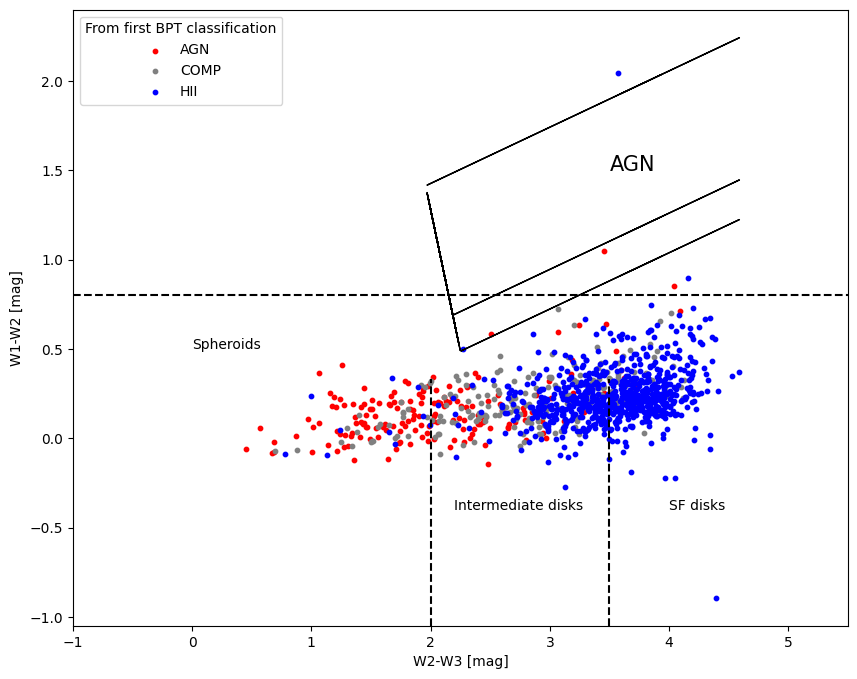

In [231]:
# plotting of the WISE diagrams 
plt.figure(figsize=(10,8))
plt.xlabel('W2-W3 [mag]')
plt.ylabel('W1-W2 [mag]')

# plotting using BPT classification by defining a function
def plot_bpt(data, classification, color):
    data_to_plot = data[data3['BPT 1 classification'] == classification]
    plt.scatter(data_to_plot['W2-W3'], data_to_plot['W1-W2'], color=color, s=10)
    
#bpt_class = ['AGN', 'COMP', 'HII']
#colors = ['blue', 'red', 'peru']


# BPT classification to colors and labels
bpt_class = ['AGN', 'COMP', 'HII']
legend_labels = ['AGN', 'COMP', 'SFG']  # Rename HII to SFG
colors = ['red', 'grey', 'blue']



for i in range(len(bpt_class)):
    plot_bpt(data3, bpt_class[i], colors[i])

plt.legend(bpt_class, title='From first BPT classification')

plt.plot(W_x[mask6], W_y3[mask6], color='black', linewidth=1)
plt.plot(W_x[mask3], W_y4[mask3], color='black', linewidth=1)
plt.plot(W_x[mask4], W_y5[mask4], color='black', linewidth=1)
plt.plot(W_x[mask5], W_y1[mask5], color='black', linewidth=1)

#plotting a horizontal line in a scatter plot
plt.axhline(0.8, linestyle='--', color='black')   

#plotting a vertical line in a scatter plot
plt.axvline(2, ymax=0.4, linestyle='--', color='black')
plt.axvline(3.5, ymax=0.4, linestyle='--', color='black')
plt.xlim(-1, 5.5)

plt.text(3.5,1.5, 'AGN', fontsize=15)
plt.text(0,0.5, 'Spheroids', fontsize=10)
plt.text(2.2,-0.4, 'Intermediate disks', fontsize=10)
plt.text(4,-0.4, 'SF disks', fontsize=10)

In [233]:
# counting the no. of each type of classification, i.e., AGN  
mask10 = data3[['WISE classification', 'Mateos classification', 'BPT 1 classification']] == 'AGN'
# Use the boolean mask to filter the dataframe and count the number of matches
count1 = mask10.all(axis=1).sum()
print(count1)   #AGN

1


In [235]:
# counting the no. of each type of classification, i.e., AGN  
mask10 = data3[['Mateos classification', 'BPT 1 classification']] == 'AGN'
# Use the boolean mask to filter the dataframe and count the number of matches
count1 = mask10.all(axis=1).sum()
print(count1)   #AGN

2


In [237]:
# counting the no. of each type of classification, i.e., AGN  
mask10 = data3[['WISE classification', 'BPT 1 classification']] == 'AGN'
# Use the boolean mask to filter the dataframe and count the number of matches
count1 = mask10.all(axis=1).sum()
print(count1)   #AGN

2


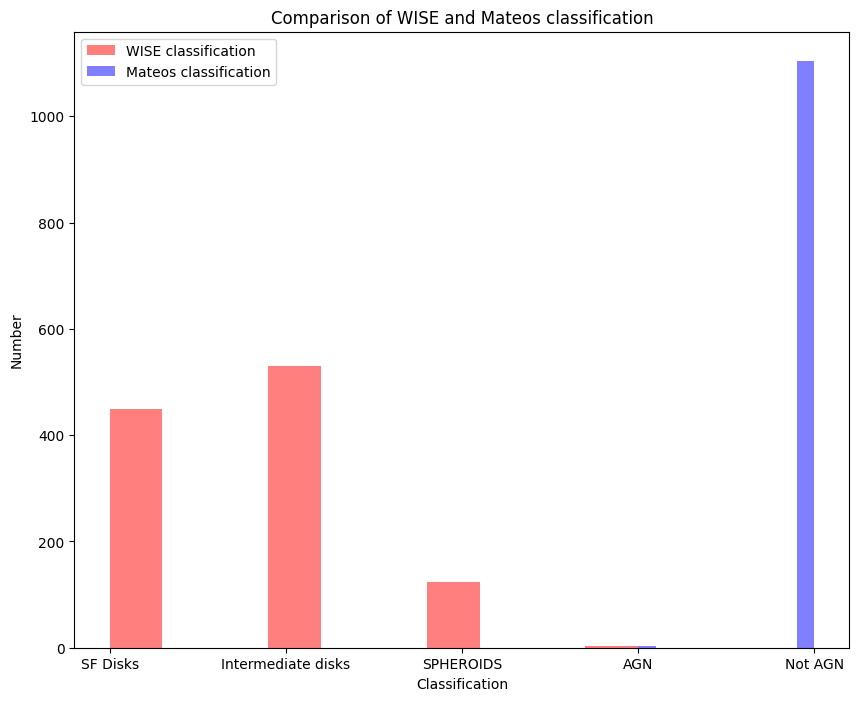

In [239]:
plt.figure(figsize=(10,8))
plt.hist(data3['WISE classification'], color='red', label='WISE classification', alpha=0.5)
plt.hist(data3['Mateos classification'], color='blue', label='Mateos classification', alpha=0.5)
#plt.hist(data6['BPT 1 classification'], color='yellow', label='BPT 1 classification', alpha=0.5)
plt.xlabel('Classification')
plt.ylabel('Number')
plt.title('Comparison of WISE and Mateos classification')
plt.legend()
plt.show()

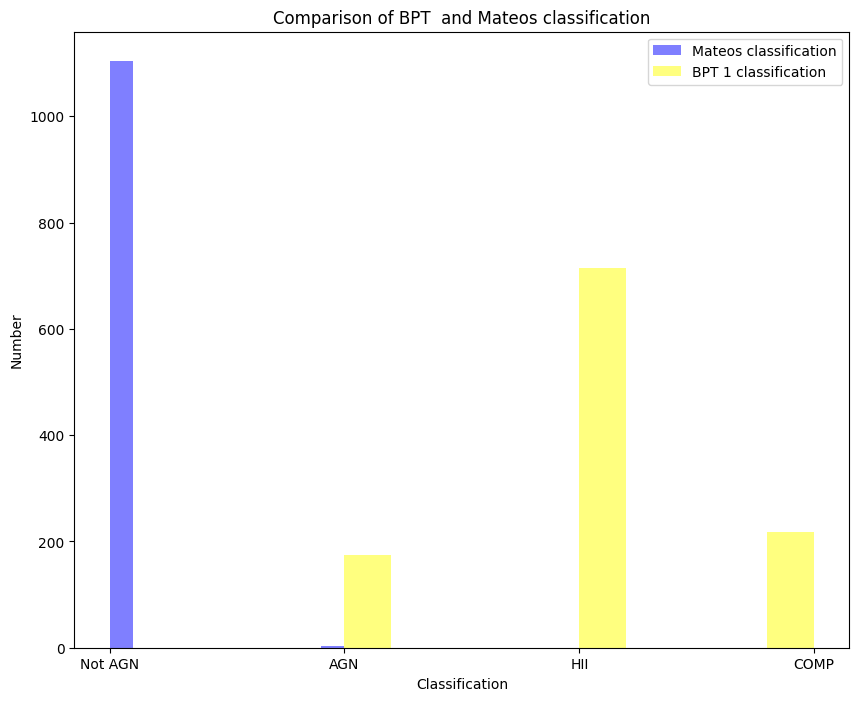

In [247]:
plt.figure(figsize=(10,8))
#plt.hist(data3['WISE classification'], color='red', label='WISE classification', alpha=0.5)
plt.hist(data3['Mateos classification'], color='blue', label='Mateos classification', alpha=0.5)
plt.hist(data3['BPT 1 classification'], color='yellow', label='BPT 1 classification', alpha=0.5)
plt.xlabel('Classification')
plt.ylabel('Number')
plt.title('Comparison of BPT  and Mateos classification')
plt.legend()
plt.show()

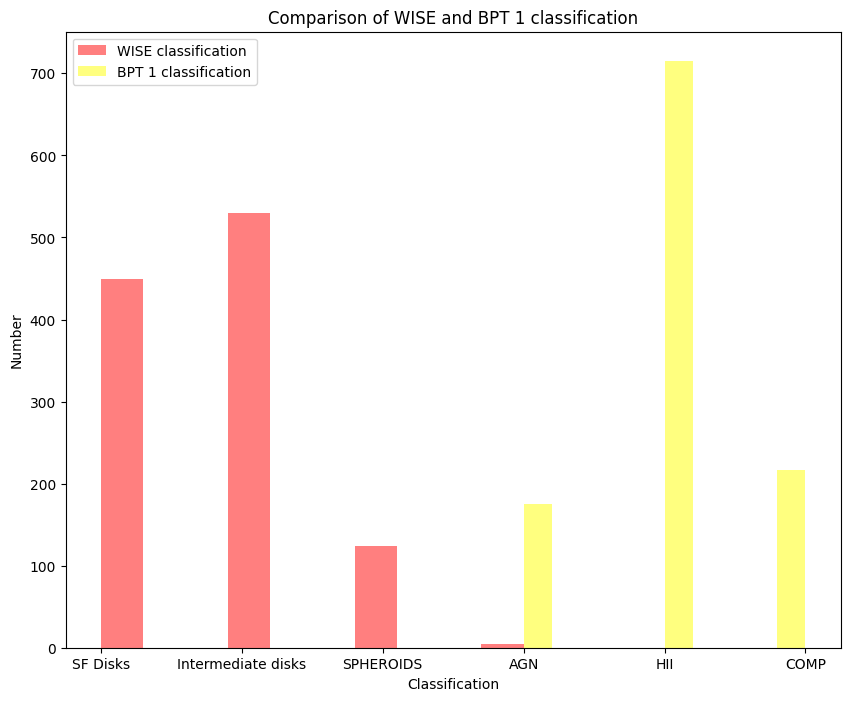

In [249]:
plt.figure(figsize=(10,8))
plt.hist(data3['WISE classification'], color='red', label='WISE classification', alpha=0.5)
#plt.hist(data3['Mateos classification'], color='orange', label='Mateos classification', alpha=0.5)
plt.hist(data3['BPT 1 classification'], color='yellow', label='BPT 1 classification', alpha=0.5)
plt.xlabel('Classification')
plt.ylabel('Number')
plt.title('Comparison of WISE and BPT 1 classification')
plt.legend()
plt.show()

print(
    f"AGN in BPT: {data3[data3['BPT 1 classification'] == 'AGN'].count()[0] / len(data3) * 100:.2f} %"
    + f"\nAGN in WISE: {data3[data3['WISE classification'] == 'AGN'].count()[0] / len(data3) * 100:.2f} %"
    + f"\nAGN in Mateos: {data3[data3['Mateos classification'] == 'AGN'].count()[0] / len(data3) * 100:.2f} %"
)


In [266]:
# SDSS vs WISE
print(
    f"AGN in BPT and WISE: {data3[(data3['BPT 1 classification'] == 'AGN') & (data3['WISE classification'] == 'AGN')].count()[0] / len(data3) * 100:.2f} %"
    + f"\nAGN in BPT but not WISE: {data3[(data3['BPT 1 classification'] == 'AGN') & (data3['WISE classification'] != 'AGN')].count()[0] / len(data3) * 100:.2f} %"
    + f"\nAGN in WISE but not BPT: {data3[(data3['BPT 1 classification'] != 'AGN') & (data3['WISE classification'] == 'AGN')].count()[0] / len(data3) * 100:.2f} %"
)


AGN in BPT and WISE: 0.18 %
AGN in BPT but not WISE: 15.63 %
AGN in WISE but not BPT: 0.18 %


/tmp/ipykernel_22648/871535668.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"AGN in BPT and WISE: {data3[(data3['BPT 1 classification'] == 'AGN') & (data3['WISE classification'] == 'AGN')].count()[0] / len(data3) * 100:.2f} %"
/tmp/ipykernel_22648/871535668.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + f"\nAGN in BPT but not WISE: {data3[(data3['BPT 1 classification'] == 'AGN') & (data3['WISE classification'] != 'AGN')].count()[0] / len(data3) * 100:.2f} %"
/tmp/ipykernel_22648/871535668.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys

Low overlap between objects classified as AGNs using SDSS and WISE. There was also a reduction of the sample size while cross-matching the objects between both surveys. More objects classified as AGNs using SDSS were not classified as the same using WISE.

## Task 3

## Task 4

From a catalogue of SDSS Stripe82 variable sources select a sample (at least 10) of quasar
(type 1 AGN) light curve and test the QNPy package, for quasar light curves modeling using
Conditional Neural Processes (follow tutorial without clustering, tip: check the demo workshop
from SER-SAG-S1). For each light curve provides a basic info-sheet of light curve properties
(i.e., number of points, number of gaps (think of a metric to identify gaps), mean and median
sampling, maximal/minimal/mean/median magnitude, variability amplitude), and plot their
distributions. Comment on how well the QNPy models the light curve based on the above
listed light curve parameters.

A catalogue of SDSS Stripe82 containing recalibrated light curves for all spectroscopically confirmed QSOs were obtained from: http://faculty.washington.edu/ivezic/sdss/catalogs/S82variables.html

We follow 3 steps to model the lcs
- Preprocessing
- Splitting and Training
- Predictions and plotting

#### Preprocessing

In [48]:
pip install QNPy

Note: you may need to restart the kernel to use updated packages.


In [50]:
import QNPy #Importing the package

from QNPy import Preprocess as pr #Importing Preprocess module from the package
from QNPy.Preprocess import transform #importing the funcion transform for transformation the data
from QNPy.Preprocess import * #importing all external packages from Preprocess

In [52]:
#Importing the data. This can be done in any desired manner, but the data must contain:
#mjd - MJD or time, mag-magnitude and magerr-magnitude error. 

path = '/home/user/Documents/AGN/project/Task4/stripe82' #path to data
dat_files = glob.glob(path + "/*.dat")

for file in dat_files:
    data = pd.read_csv(file,names=['mjd','filter','mag','magerr'],sep='\s+')
    data = data[data['filter'] == 'r']
    data=data.drop(columns='filter', axis=1)
    data.mjd=data.mjd.str.replace('#', '')

    filename = os.path.splitext(os.path.basename(file).split('/')[-1])[0]
    data.to_csv('/home/user/Documents/AGN/project/Task4/qnpy_files/light_curves/%s.csv'%filename)
data.head()

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_35733/822031681.py:8: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(file,names=['mjd','filter','mag','magerr'],sep='\s+')


,mjd,mag,magerr
0,51081.416961,18.546,0.009
5,51818.402927,18.476,0.009
10,51875.231920,18.387,0.008
15,52171.391022,18.451,0.009
20,52171.464344,18.450,0.008


In [54]:
#Cleaning the outliers first approach
# This function cleans data in CSV files, removing outliers based on a specified threshold, 
#and saves the cleaned files without aggregating time and fluxes.

input_folder = '/home/user/Documents/AGN/project/Task4/qnpy_files/light_curves'
output_folder = '/home/user/Documents/AGN/project/Task4/light_curves_clean'
threshold = 3.0

outliers=pr.clean_and_save_outliers(input_folder, output_folder, threshold=threshold)

Cleaned and saved LC_3104329.csv to /home/user/Documents/AGN/project/Task4/light_curves_clean/LC_3104329.csv
Cleaned and saved LC_3152786.csv to /home/user/Documents/AGN/project/Task4/light_curves_clean/LC_3152786.csv
Cleaned and saved LC_2473812.csv to /home/user/Documents/AGN/project/Task4/light_curves_clean/LC_2473812.csv
Cleaned and saved LC_3844725.csv to /home/user/Documents/AGN/project/Task4/light_curves_clean/LC_3844725.csv
Cleaned and saved LC_2524327.csv to /home/user/Documents/AGN/project/Task4/light_curves_clean/LC_2524327.csv
Cleaned and saved LC_3102202.csv to /home/user/Documents/AGN/project/Task4/light_curves_clean/LC_3102202.csv
Cleaned and saved LC_3032591.csv to /home/user/Documents/AGN/project/Task4/light_curves_clean/LC_3032591.csv
Cleaned and saved LC_2579983.csv to /home/user/Documents/AGN/project/Task4/light_curves_clean/LC_2579983.csv
Cleaned and saved LC_3078106.csv to /home/user/Documents/AGN/project/Task4/light_curves_clean/LC_3078106.csv
Cleaned and saved L

In [56]:
#Path to Padded Data
DATA_SRC = "/home/user/Documents/AGN/project/Task4/qnpy_files/Padded_lc" 
#path to folder to save preproc data (transformed data) + errors
DATA_DST = "/home/user/Documents/AGN/project/Task4/qnpy_files/preproc" 

In [58]:
# Padding the light curves
# We added the function for backward padding the curves with last observed value
# The length for padding should remain 100 or above 

padding= pr.backward_pad_curves(output_folder, DATA_SRC, desired_observations=100)

Created new file: /home/user/Documents/AGN/project/Task4/qnpy_files/Padded_lc/LC_3104329.csv
Created new file: /home/user/Documents/AGN/project/Task4/qnpy_files/Padded_lc/LC_3152786.csv
Created new file: /home/user/Documents/AGN/project/Task4/qnpy_files/Padded_lc/LC_2473812.csv
Created new file: /home/user/Documents/AGN/project/Task4/qnpy_files/Padded_lc/LC_3844725.csv
Created new file: /home/user/Documents/AGN/project/Task4/qnpy_files/Padded_lc/LC_2524327.csv
Created new file: /home/user/Documents/AGN/project/Task4/qnpy_files/Padded_lc/LC_3102202.csv
Created new file: /home/user/Documents/AGN/project/Task4/qnpy_files/Padded_lc/LC_3032591.csv
Created new file: /home/user/Documents/AGN/project/Task4/qnpy_files/Padded_lc/LC_2579983.csv
Created new file: /home/user/Documents/AGN/project/Task4/qnpy_files/Padded_lc/LC_3078106.csv
Created new file: /home/user/Documents/AGN/project/Task4/qnpy_files/Padded_lc/LC_3097526.csv


In [60]:
# making corrections to the columns of the new light curve files
csv_files = glob.glob(DATA_SRC + "/*.csv")
for file in csv_files:
    data = pd.read_csv(file)
    data['mjd'], data['mag'], data['magerr'] = data['Unnamed: 0'], data['mjd'], data['mag']
    data = data.drop(columns='Unnamed: 0', axis=1)
    data.to_csv(file)
data.head()

,mjd,mag,magerr
0,51075.423870,19.854,0.020
1,51818.393523,19.967,0.020
2,51819.478721,20.033,0.023
3,51875.222592,20.009,0.023
4,52171.381620,20.053,0.024


In [62]:
#listing the data that are going to be transformed. 
files = os.listdir(DATA_SRC)

In [64]:
#running the transformation function
number_of_points, trcoeff = pr.transform_and_save(files, DATA_SRC, DATA_DST, transform)

In [66]:
trcoeff

[['LC_3104329', 51081.408267, 54412.380653, 18.874, 19.398],
 ['LC_3152786', 51081.417441, 54412.389911, 19.637, 20.233],
 ['LC_2473812', 51081.404271, 54412.376697, 17.551, 17.948],
 ['LC_3844725', 51075.438598, 54412.394702, 19.436, 20.08],
 ['LC_2524327', 51075.411122, 54412.367238, 18.235, 18.555],
 ['LC_3102202', 51075.435413, 54412.391573, 19.807, 20.401],
 ['LC_3032591', 51081.416961, 54412.38945, 18.369, 18.581],
 ['LC_2579983', 51075.422538, 54412.378713, 18.586, 19.123],
 ['LC_3078106', 51075.431537, 54412.387647, 19.564, 20.12],
 ['LC_3097526', 51075.42387, 54412.379986, 19.854, 20.361]]

#### Splitting and training

In [75]:
pip install torch --extra-index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.8/175.8 MB 7.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 7.3 MB/s eta 0:00:007.5 MB/s eta 0:00:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12━━━━━━━━━━━━━ 0/2 [sympy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [torch]━━━━━ 1/2 [torch]
Note: you may need to restart the kernel to use updated packages.


In [77]:
#!pip install QNPy
import QNPy #Importing the package
from QNPy import SPLITTING_AND_TRAINING as st #Importing SPLITTING_AND_TRAINING module from the package
from QNPy.SPLITTING_AND_TRAINING import * #Importing all packages from SPLITTING_AND_TRAINING module


In [79]:
import torch
print(torch.__version__)


2.7.1+cpu


In [101]:
DATA_SRC = "/home/user/Documents/AGN/project/Task4/qnpy_files/preproc" #Path to transformed data
files = os.listdir(DATA_SRC) #listing the transformed data

In [107]:
#creating the folders for saving the splitted data
st.create_split_folders(train_folder='/home/user/Documents/AGN/project/Task4/qnpy_files/dataset/train/', test_folder='/home/user/Documents/AGN/project/Task4/qnpy_files/dataset/test/', val_folder='/home/user/Documents/AGN/project/Task4/qnpy_files/dataset/val/')

In [109]:
#path to TRAIN, TEST and VAL folders where your splitted data will be saved. 

TRAIN_FOLDER = '/home/user/Documents/AGN/project/Task4/qnpy_files/dataset/train/'
TEST_FOLDER = '/home/user/Documents/AGN/project/Task4/qnpy_files/dataset/test/'
VAL_FOLDER = '/home/user/Documents/AGN/project/Task4/qnpy_files/dataset/val/'

In [111]:
#running the function for splitting the data
st.split_data(files, DATA_SRC, TRAIN_FOLDER, TEST_FOLDER, VAL_FOLDER) 

100%|██████████| 30/30 [00:00<00:00, 705.88it/s]


In [113]:
DATA_PATH_TRAIN = "/home/user/Documents/AGN/project/Task4/qnpy_files/dataset/train" #path to train folder
DATA_PATH_VAL = "/home/user/Documents/AGN/project/Task4/qnpy_files/dataset/val" #path to val folder
DATA_PATH_TEST = "/home/user/Documents/AGN/project/Task4/qnpy_files/dataset/test/"
MODEL_PATH = "/home/user/Documents/AGN/project/Task4/qnpy_files/output/cnp_model.pth" #path for saving model

In [115]:
BATCH_SIZE=32 #Defining the batch size, it should remain 32

In [117]:
#running the function for getting the data loaders of data that are going to be trained
trainLoader, valLoader = st.get_data_loaders(DATA_PATH_TRAIN, DATA_PATH_VAL, BATCH_SIZE)

In [127]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [129]:
#runing the function fo creating the model (deterministic model is default) 
#and optimiser (LogProbLoss), mseMetric (MSELoss)
model, optimizer, criterion, mseMetric, maeMetric = st.create_model_and_optimizer(device) 

In [136]:
# to reduce dataset size for testing inorder to avoid crashing
import warnings
warnings.filterwarnings("ignore")

In [140]:
st.train_model(
    model, trainLoader, valLoader, criterion, optimizer, 1, 1000, 500, mseMetric, maeMetric, device)

100%|██████████| 1000/1000 [00:46<00:00, 21.31it/s]


([[51.997623443603516,
   61.80439758300781,
   46.027427673339844,
   47.88615798950195,
   48.337276458740234,
   62.469337463378906,
   56.08780288696289,
   59.92361068725586,
   73.31123352050781,
   48.34743881225586,
   52.2030029296875,
   46.77396011352539,
   68.82218170166016,
   67.58230590820312,
   60.57475280761719,
   53.92510986328125,
   47.37852478027344,
   60.437679290771484,
   70.84941864013672,
   56.96225357055664,
   57.3252067565918,
   55.218421936035156,
   56.644691467285156,
   42.442604064941406,
   74.85102081298828,
   57.997737884521484,
   72.53640747070312,
   66.50952911376953,
   66.70835876464844,
   60.507347106933594,
   53.62371826171875,
   47.43716049194336,
   78.8908462524414,
   45.99861145019531,
   65.06208038330078,
   68.70452117919922,
   65.45523071289062,
   76.05854797363281,
   51.369747161865234,
   61.270259857177734,
   73.66816711425781,
   64.72164916992188,
   65.97630310058594,
   55.466941833496094,
   67.73121643066406,


In [142]:
#function for training the data
#1 - number of train_model function runs
#3000 - number of epochs
#2000 - number of early stopping limit

history_loss_train, history_loss_val, \
history_mse_train, history_mse_val, \
history_mae_train, history_mae_val, \
epoch_counter_train_loss, epoch_counter_train_mse, \
epoch_counter_train_mae, epoch_counter_val_loss, \
epoch_counter_val_mse, epoch_counter_val_mae = st.train_model(
    model, trainLoader, valLoader, criterion, optimizer,  1, 1000, 500, mseMetric, maeMetric, device)

 60%|█████▉    | 596/1000 [00:28<00:19, 21.24it/s]

Early stopped at epoch 596!
Best model at epoch 96!


In [146]:

# Define the file names for saving the lists for all histories
file_names = ["/home/user/Documents/AGN/project/Task4/qnpy_files/history_loss_train.csv", "/home/user/Documents/AGN/project/Task4/qnpy_files/history_loss_val.csv", "/home/user/Documents/AGN/project/Task4/qnpy_files/history_mse_train.csv", "/home/user/Documents/AGN/project/Task4/qnpy_files/history_mse_val.csv",
              "/home/user/Documents/AGN/project/Task4/qnpy_files/history_mae_train.csv", "/home/user/Documents/AGN/project/Task4/qnpy_files/history_mae_val.csv", "/home/user/Documents/AGN/project/Task4/qnpy_files/epoch_counter_train_loss.csv",
              "/home/user/Documents/AGN/project/Task4/qnpy_files/epoch_counter_train_mse.csv", "/home/user/Documents/AGN/project/Task4/qnpy_files/epoch_counter_train_mae.csv", "/home/user/Documents/AGN/project/Task4/qnpy_files/epoch_counter_val_loss.csv",
              "/home/user/Documents/AGN/project/Task4/qnpy_files/epoch_counter_val_mse.csv", "/home/user/Documents/AGN/project/Task4/qnpy_files/epoch_counter_val_mae.csv"]

# Define the lists
lists = [history_loss_train, history_loss_val, history_mse_train, history_mse_val, history_mae_train,
         history_mae_val, epoch_counter_train_loss, epoch_counter_train_mse, epoch_counter_train_mae,
         epoch_counter_val_loss, epoch_counter_val_mse, epoch_counter_val_mae]

#running the function for saving all lists with histories
save_list= st.save_lists_to_csv(file_names, lists)

In [148]:
history_loss_train_file = '/home/user/Documents/AGN/project/Task4/qnpy_files/history_loss_train.csv'  
history_loss_val_file = '/home/user/Documents/AGN/project/Task4/qnpy_files/history_loss_val.csv'  
epoch_counter_train_loss_file = '/home/user/Documents/AGN/project/Task4/qnpy_files/epoch_counter_train_loss.csv'  


history_mse_train_file = '/home/user/Documents/AGN/project/Task4/qnpy_files/history_mse_train.csv'
history_mse_val_file = '/home/user/Documents/AGN/project/Task4/qnpy_files/history_mse_val.csv'  
epoch_counter_train_mse_file = '/home/user/Documents/AGN/project/Task4/qnpy_files/epoch_counter_train_mse.csv' 


history_mae_train_file = '/home/user/Documents/AGN/project/Task4/qnpy_files/history_mae_train.csv'
history_mae_val_file = '/home/user/Documents/AGN/project/Task4/qnpy_files/history_mae_val.csv'  
epoch_counter_train_mae_file = '/home/user/Documents/AGN/project/Task4/qnpy_files/epoch_counter_train_mae.csv'  


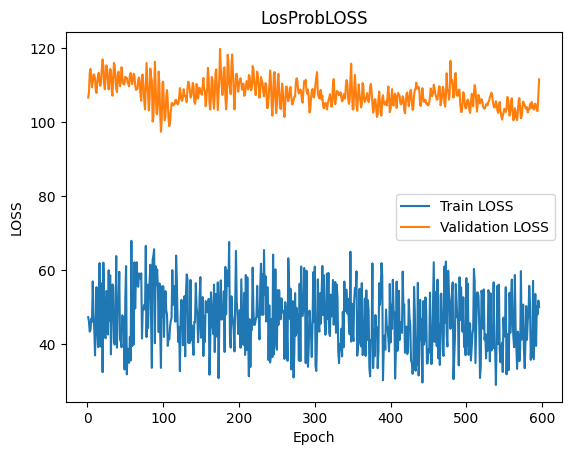

In [150]:
#plotting the Logprobloss after training
logprobloss=st.plot_loss(history_loss_train_file, history_loss_val_file, epoch_counter_train_loss_file)

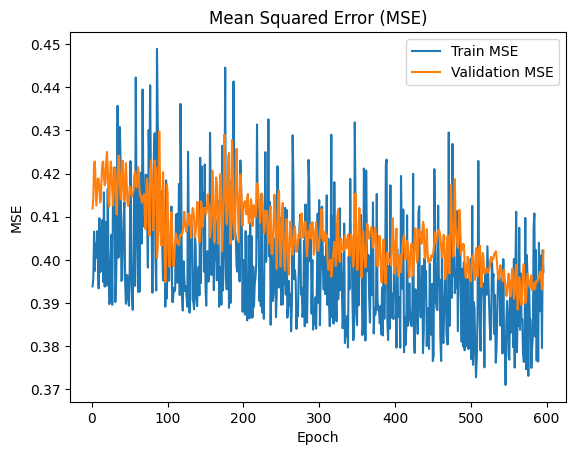

In [152]:
#plotting the MSE metric after training
msemetric=st.plot_mse(history_mse_train_file, history_mse_val_file, epoch_counter_train_mse_file)

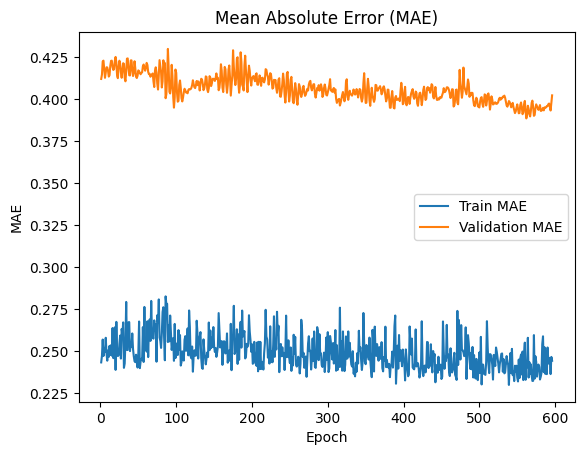

In [154]:
#plotting the MAE metric after training
maemetric=st.plot_mae(history_mae_train_file, history_mae_val_file, epoch_counter_train_mae_file)

#### Prediction and ploting

In [301]:
import QNPy #Importing the package
#Importing PREDICTION_onePDF_original_mjd module from the package
from QNPy import PREDICTION_onePDF_original_mjd as pop
#Importing all packages from PREDICTION_onePDF_original_mjd module
from QNPy.PREDICTION_onePDF_original_mjd import * 
#The functions plot_function2, back_x, back_y and find_LC_transorm must be imported separately
from QNPy.PREDICTION_onePDF_original_mjd import plot_function2, back_x, back_y, find_LC_transform 

In [339]:
# Creating all needed folders
pop.create_prediction_folders()

OUTPUT_PATH = "output/predictions/" #path where to save the plots and data

Folder already exists: ./output/predictions/train
Folder already exists: ./output/predictions/train/plots
Folder already exists: ./output/predictions/train/data
Folder already exists: ./output/predictions/test
Folder already exists: ./output/predictions/test/plots
Folder already exists: ./output/predictions/test/data
Folder already exists: ./output/predictions/val
Folder already exists: ./output/predictions/val/plots
Folder already exists: ./output/predictions/val/data


In [341]:
clearfolders=pop.clear_output_dir(OUTPUT_PATH)#clearing the output directorium, it can be sciped
criterion, mseMetric=pop.get_criteria()#loading criterion adn metrics

In [343]:
#deleting the padded values from test set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "/home/user/Documents/AGN/project/Task4/qnpy_files/dataset/test"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: LC_3078106_original_split1.csv


In [345]:
#deleting the padded values from train set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "/home/user/Documents/AGN/project/Task4/qnpy_files/dataset/train"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: LC_3844725_original_split19.csv
Removed padding in file: LC_3152786_original_split29.csv
Removed padding in file: LC_3102202_original_split20.csv
Removed padding in file: LC_3104329_original_split8.csv
Removed padding in file: LC_3097526_original_split3.csv
Removed padding in file: LC_2524327_original_split15.csv
Removed padding in file: LC_3032591_original_split7.csv
Removed padding in file: LC_2473812_original_split21.csv
Removed padding in file: LC_2579983_original_split5.csv


In [365]:
#deleting the padded values from val set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "/home/user/Documents/AGN/project/Task4/qnpy_files/dataset/val"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: LC_2579983_original_split29.csv
Removed padding in file: LC_2473812_original_split17.csv


In [367]:
#deleting the padded values from val set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "/home/user/Documents/AGN/project/Task4/qnpy_files/dataset/val"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: LC_2579983_original_split29.csv
Removed padding in file: LC_2473812_original_split17.csv


In [369]:
tr=pop.load_trcoeff()#loading the transformation coeff

In [371]:
import os
print("Files in validation path:", os.listdir(DATA_PATH_VAL))


Files in validation path: ['LC_2579983_original_split29.csv', 'LC_2473812_original_split17.csv']


In [373]:
val_data = pop.load_val_data(DATA_PATH_VAL)
print(val_data)


(<QNPy.CNP_DATASETCLASS.LighCurvesDataset object at 0x7c0f0d13a570>, <torch.utils.data.dataloader.DataLoader object at 0x7c0f0d4028d0>)


In [375]:
testSet, testLoader=pop.load_test_data(DATA_PATH_TEST)#loading test data
trainSet, trainLoader=pop.load_train_data(DATA_PATH_TRAIN)#loading train data
valSet, valLoader = pop.load_val_data(DATA_PATH_VAL)#loading validation data

100%|██████████| 1/1 [00:00<00:00, 21.42it/s]


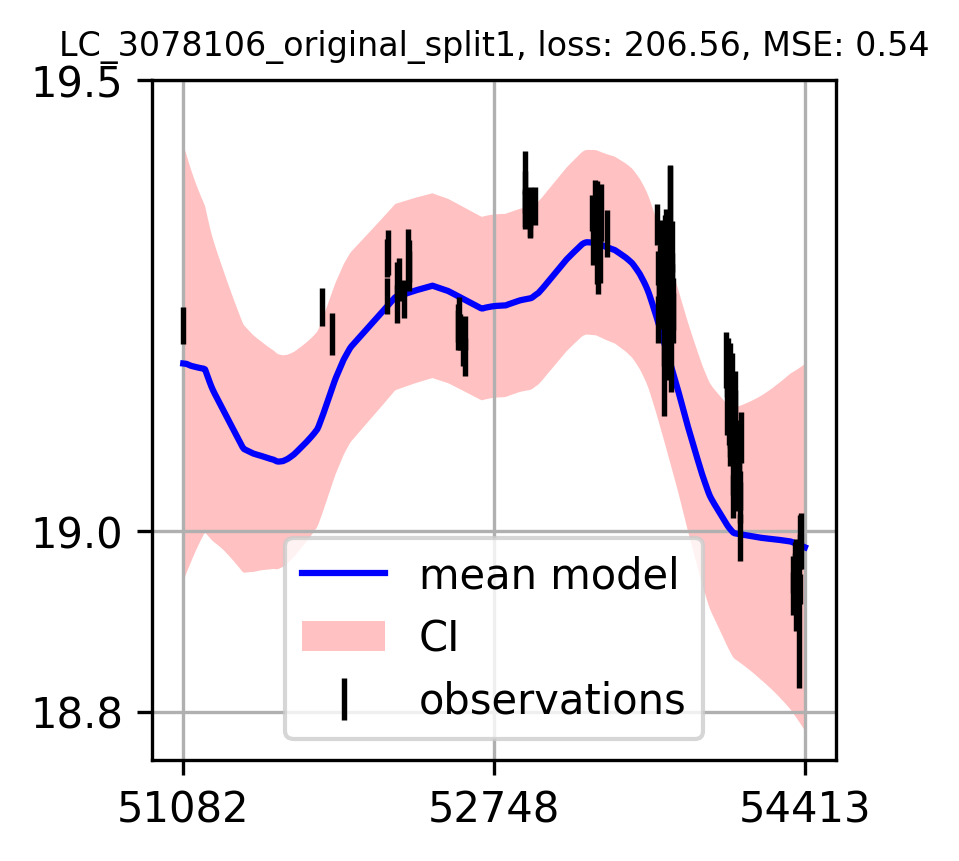

In [389]:
#prediction and plotting od test data
testMetrics=pop.plot_test_light_curves(model, testLoader, criterion, mseMetric, plot_function2, device,tr)

 44%|████▍     | 4/9 [00:00<00:00, 34.68it/s]

100%|██████████| 9/9 [00:00<00:00, 15.31it/s]


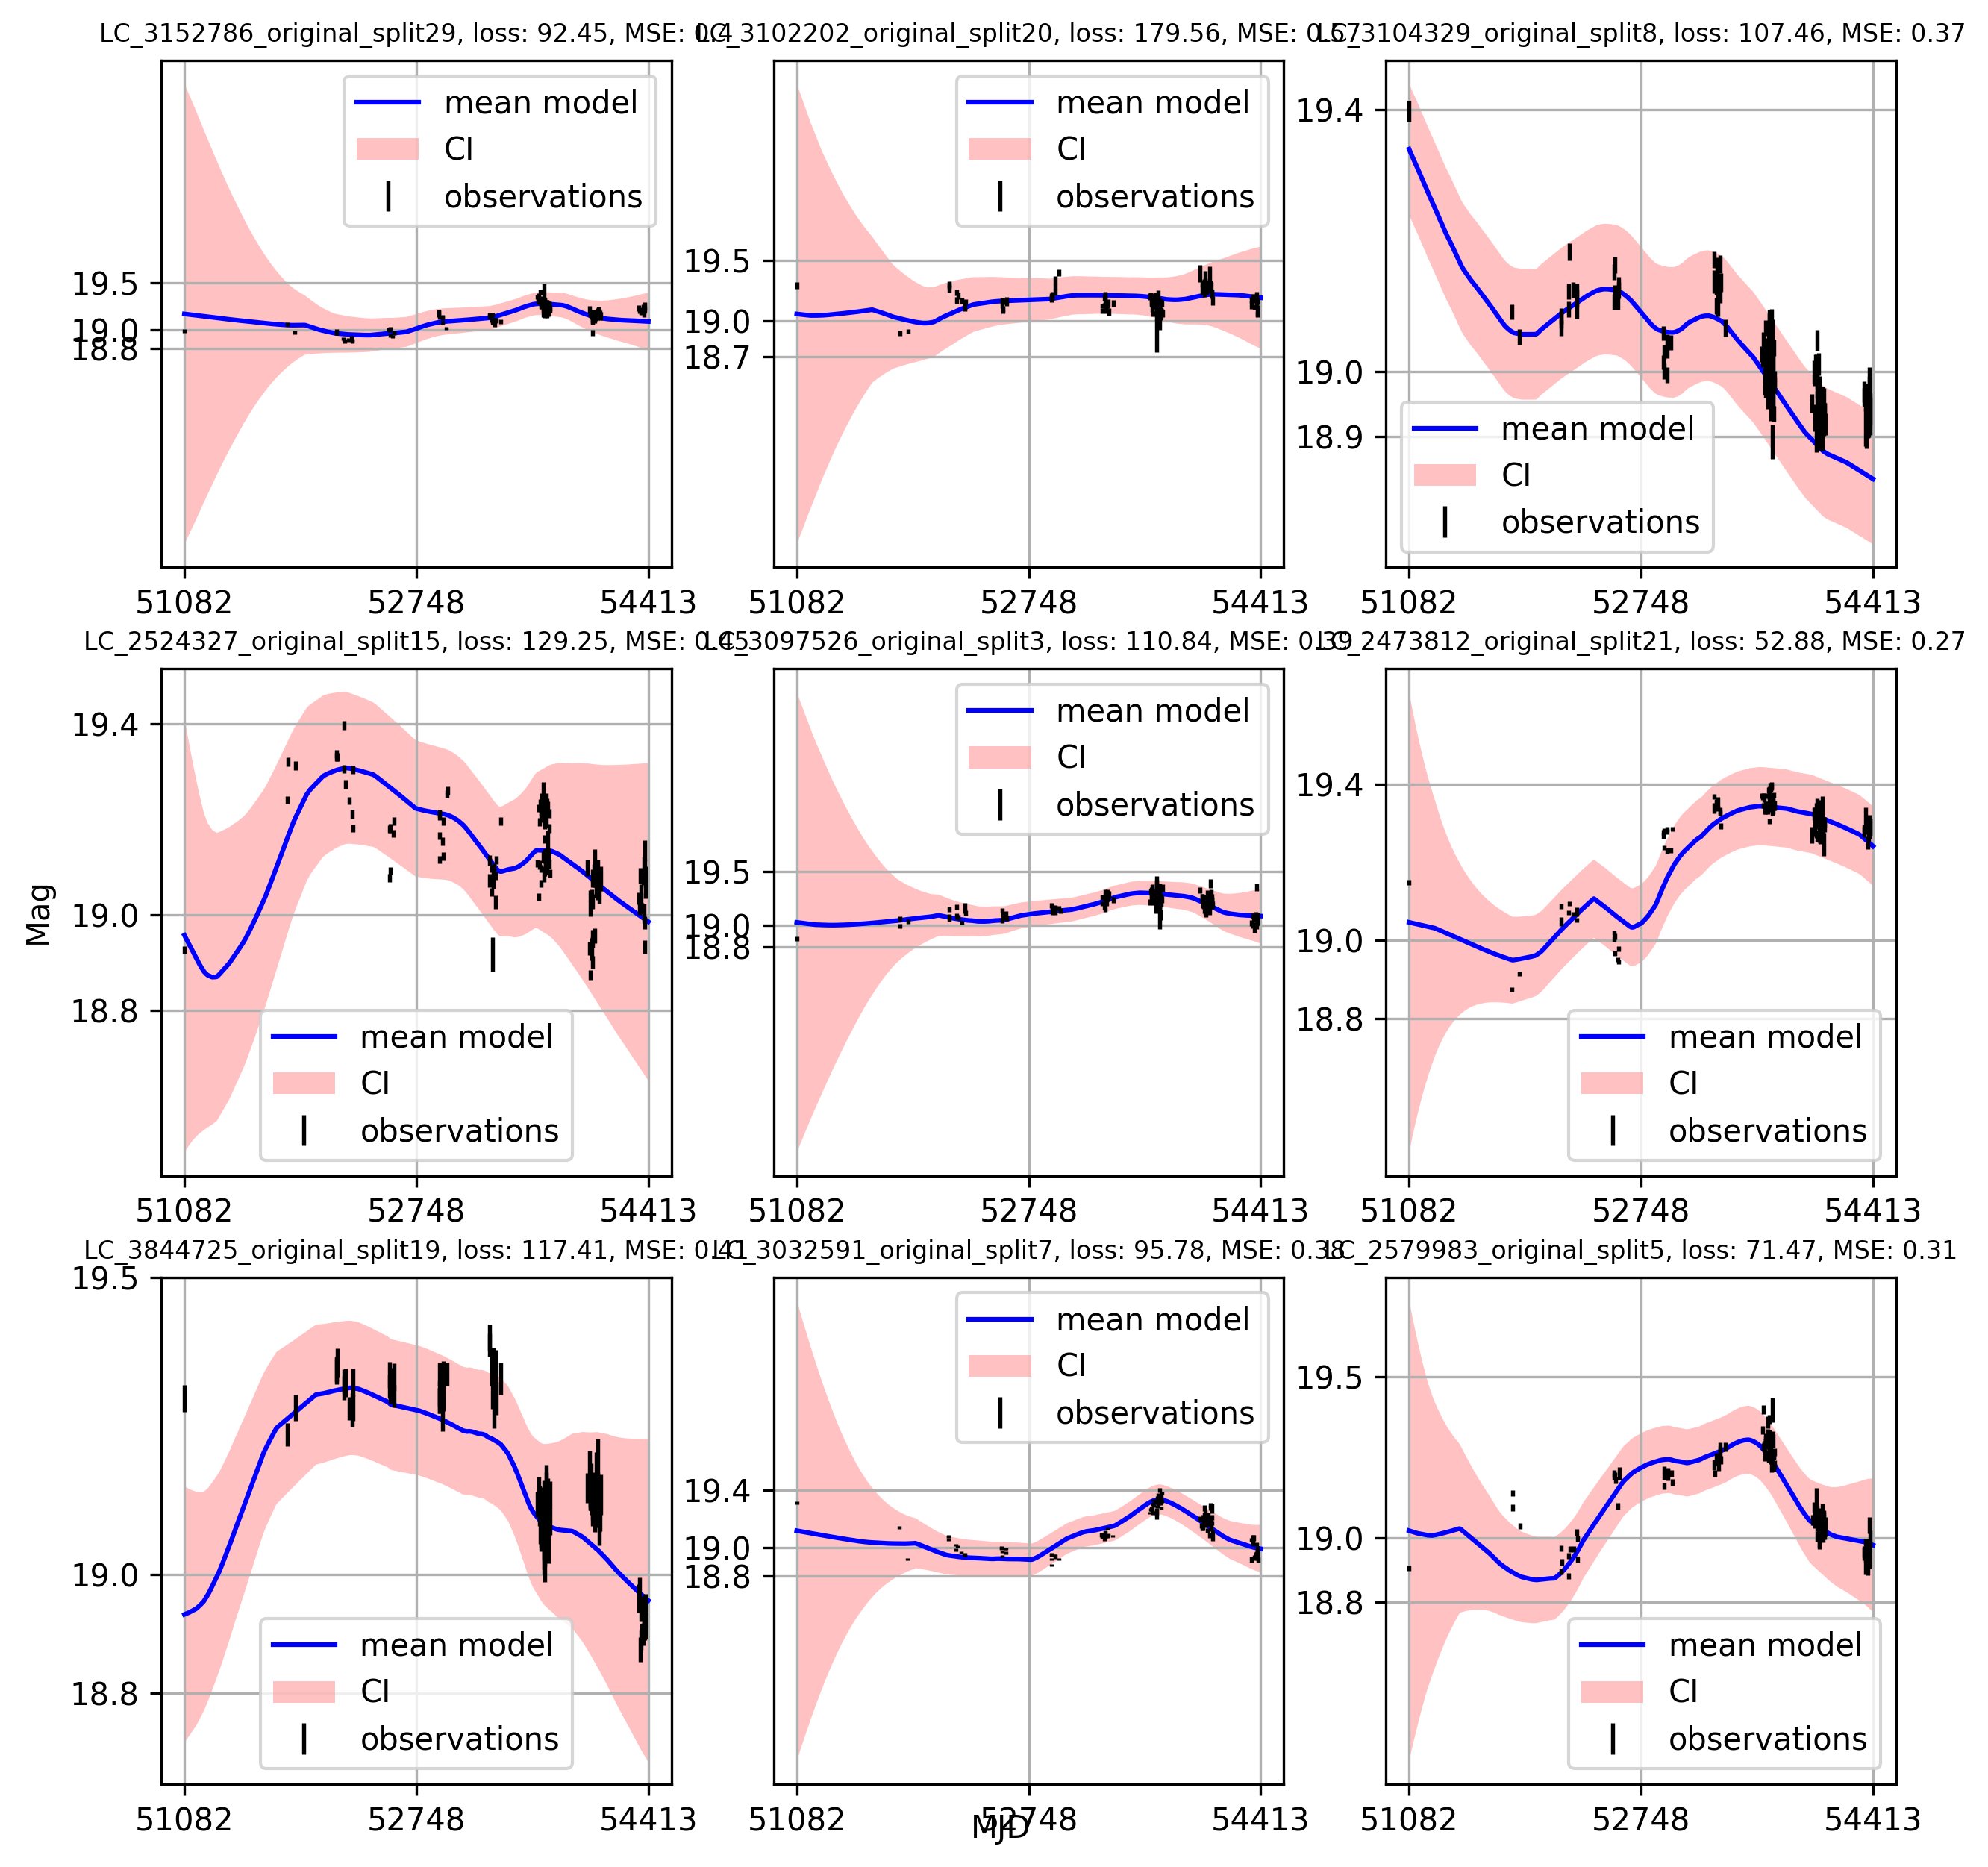

In [379]:
#prediction and plotting train data
trainMetrics=pop.plot_train_light_curves(model, trainLoader, criterion, mseMetric, plot_function2, device,tr)

100%|██████████| 2/2 [00:00<00:00, 27.45it/s]


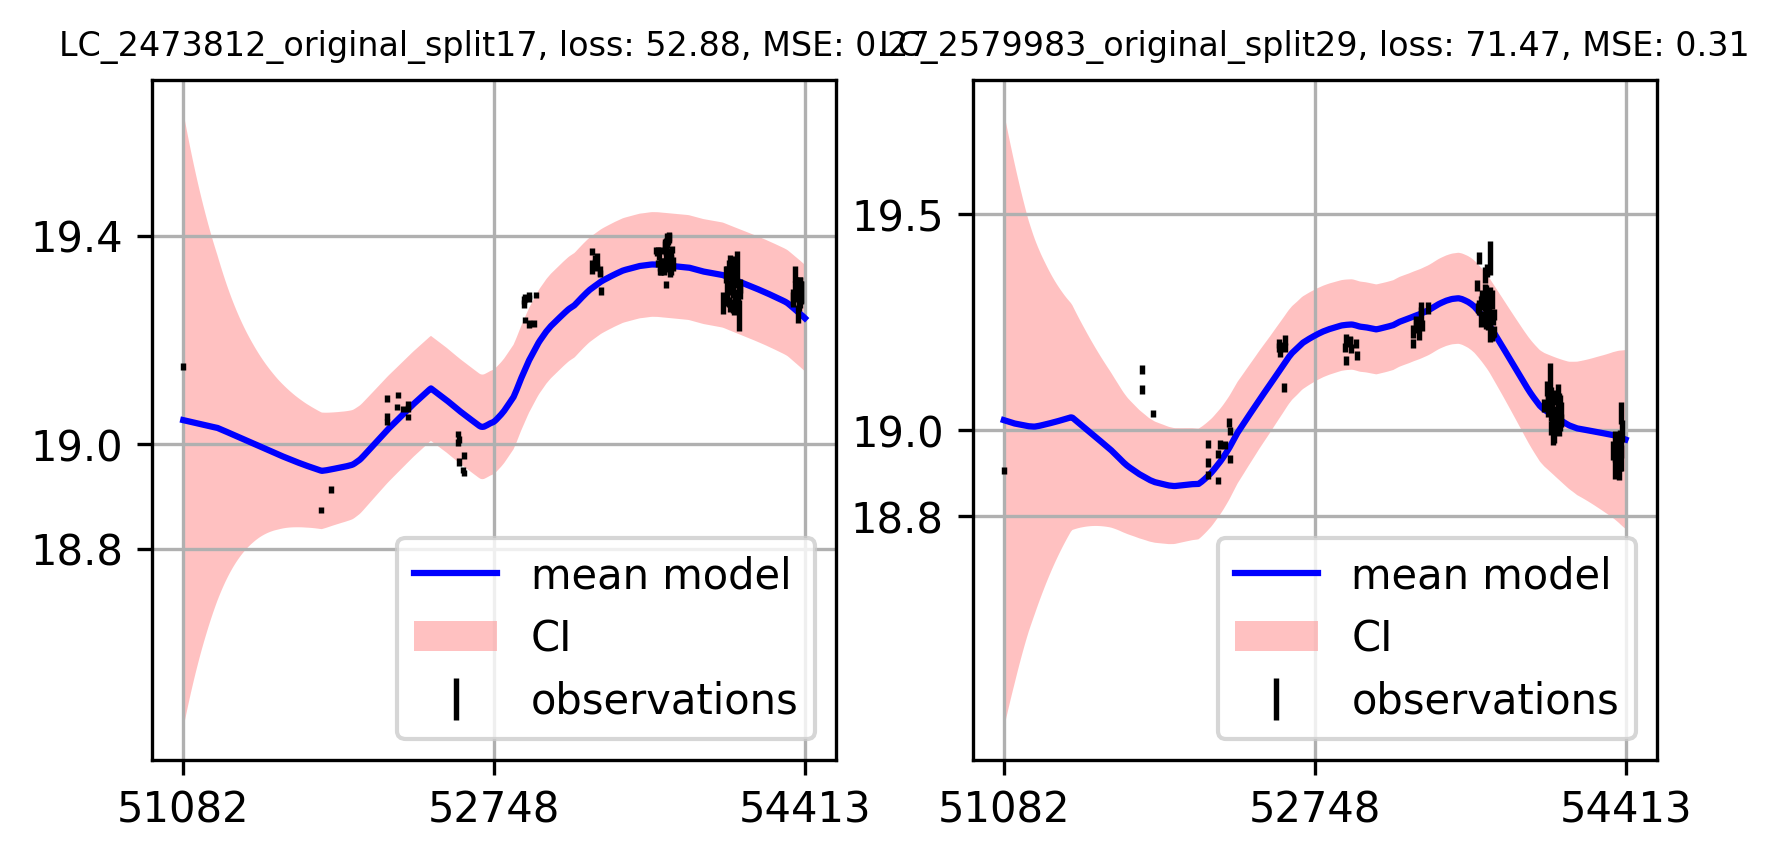

In [381]:
#prediction and plotting val data
valMetrics=pop.plot_val_light_curves(model, valLoader, criterion, mseMetric, plot_function2, device,tr)

In [383]:
savetest=pop.save_test_metrics(OUTPUT_PATH, testMetrics)#saving the test metrics
savetrain=pop.save_train_metrics(OUTPUT_PATH, trainMetrics)#saving train metrics
saveval=pop.save_val_metrics(OUTPUT_PATH, valMetrics)#saving the val metrics


In [385]:
def analyze_light_curve(lc):
    times = lc['mjd'].values
    mags = lc['mag'].values
    
    num_points = len(times)
    if num_points < 2:
        num_gaps = 0
        mean_sampling = np.nan
        median_sampling = np.nan
    else:
        gaps = np.diff(times)
        median_gap = np.median(gaps)
        num_gaps = len(gaps[gaps > 2 * median_gap])
        mean_sampling = np.mean(gaps)
        median_sampling = median_gap

    max_mag = np.max(mags)
    min_mag = np.min(mags)
    mean_mag = np.mean(mags)
    median_mag = np.median(mags)
    
    var_amp = max_mag - min_mag
    
    return {
        'num_points': num_points,
        'num_gaps': num_gaps,
        'mean_sampling': mean_sampling,
        'median_sampling': median_sampling,
        'max_magnitude': max_mag,
        'min_magnitude': min_mag,
        'mean_magnitude': mean_mag,
        'median_magnitude': median_mag,
        'variability_amplitude': var_amp
    }


In [387]:
# Info sheet for light curves in test data
info_sheet = []

test_pred_path = '/home/user/Documents/AGN/project/Task4/output/predictions/test/data'
test_pred_names = os.listdir(test_pred_path)
test_pred_path = ['/home/user/Documents/AGN/project/Task4/output/predictions/test/data/'+test_pred_names[i] for i in range(len(test_pred_names))]

for file in test_pred_path:
    lc = pd.read_csv(file)
    info = analyze_light_curve(lc)
    info['lc_id'] = os.path.basename(file)[:9]
    info_sheet.append(info)
    
info_sheet = pd.DataFrame(info_sheet).set_index('lc_id')
info_sheet.style.set_caption('Info-sheet')

,num_points,num_gaps,mean_sampling,median_sampling,max_magnitude,min_magnitude,mean_magnitude,median_magnitude,variability_amplitude
lc_id,,,,,,,,,
LC_303259,400,0,8.363308,8.363000,19.015755,18.685362,18.783498,18.737696,0.330393
LC_307810,400,0,8.363308,8.363000,19.076265,18.727585,18.941081,18.971962,0.348680
LC_315278,400,0,8.363308,8.363000,18.980812,18.690857,18.773559,18.713328,0.289955
